# Install Requirements

In [1]:
%pip install pandas matplotlib matplotlib-venn


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_9370/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load Data

In [3]:
from pathlib import Path

REPOSITORY_PATH = Path().absolute().parent
DATA_DIR = REPOSITORY_PATH / Path("data")

assert DATA_DIR.is_dir()

## Load Sources DB

In [4]:
prefixes = ["https://", "http://", "www.", '"']
suffixes = ["/", '"']


def strip_url(url: str) -> str:
    for prefix in sorted(prefixes):
        if url.startswith(prefix):
            url = url[len(prefix) :]
    for suffix in sorted(suffixes):
        if url.endswith(suffix):
            url = url[: -len(suffix)]
    return url.strip()


urls = [
    "http://muurmooi.nl/",
    "museumpassmusees.be",
    '"wikipedia.org "',
    "http://www.fonq.nl",
]
expecteds = ["muurmooi.nl", "museumpassmusees.be", "wikipedia.org", "fonq.nl"]

for url, expected in zip(urls, expecteds):
    stripped = strip_url(url)
    assert stripped == expected, f"Got: {stripped}\tExpected: {expected}"

Export instructions for `Bronnen` DB:
1. Open [Bronnen DB Notion page](https://www.notion.so/slimzoeken/ebb1bca364c64cfebc8109b4fc3951eb?v=0a032b0739b34830b01aa918585a77b7)
2. Click on `Export`
3. Select `Markdown & CSV`
4. Move downloaded archive to DATA_DIR
5. Extract downloaded archive
5. Rename extracted folder to `Bronnen DB`



In [5]:
BRONNEN_DB_DIR = DATA_DIR / Path("Bronnen DB")
assert BRONNEN_DB_DIR.is_dir()

files = list(BRONNEN_DB_DIR.glob("Bronnen DB *_all.csv"))
assert (
    len(files) == 1
), f"Expected exactly one file matchting pattern, but found: {files}"

BRONNEN_FILE = files[0]

assert BRONNEN_FILE.is_file()

In [8]:
sources = (
    pd.read_csv(
        BRONNEN_FILE,
        keep_default_na=True,
        dtype={"uBlocked trackers": "Int64"},
        converters={"Name": strip_url},
    )
    .dropna(subset=["Name", "onderzoekNR"])
    .set_index("Name", verify_integrity=True)
)
sources.head()

URL Domein  \
Name                                              
24baby.nl                https://www.24baby.nl/   
24kitchen.nl           https://www.24kitchen.nl   
333travel.nl          https://www.333travel.nl/   
absolutefacts.nl  https://www.absolutefacts.nl/   
accuautoshop.nl    https://www.accuautoshop.nl/   

                                        Conclusie over doel vd bron  \
Name                                                                  
24baby.nl                        informatieproduct div. commercieel   
24kitchen.nl      entertainment, informatieproduct div. commercieel   
333travel.nl                       webshop/winkel+promotioneel deel   
absolutefacts.nl                 informatieproduct div. commercieel   
accuautoshop.nl                    webshop/winkel+promotioneel deel   

                 Thumbs up 8-14?                    Sector  \
Name                                                         
24baby.nl           Just-in-case  Winkels en bedrijven div   
24kitchen.nl        Just-in-case   Entertainment-industrie   
333travel.nl        Just-in-case          Reisorganisaties   
absolutefacts.nl         Twijfel          Online-bedrijven   
accuautoshop.nl              Nee  Winkels en bedrijven div   

                                                            Reclame  \
Name                                                                  
24baby.nl                                          over_the_top_ads   
24kitchen.nl      company_promotion, limited_ads, sluikreclame -...   
333travel.nl                                      company_promotion   
absolutefacts.nl                                  company_promotion   
accuautoshop.nl                                   company_promotion   

                                        Vrije labels bron/onderwerp  \
Name                                                                  
24baby.nl         link/reclamevehikel, nieuws, promotioneel, web...   
24kitchen.nl              entertainment, infotainment, promotioneel   
333travel.nl      (product)informatie ihkv verkoop/bezoek, bedri...   
absolutefacts.nl        abo-print, informatie_primair_doel, webshop   
accuautoshop.nl                                             webshop   

                  uBlocked trackers Commercialiteit   Onderwerpen  \
Name                                                                
24baby.nl                         5     commercieel           NaN   
24kitchen.nl                     17     commercieel           NaN   
333travel.nl                      7     commercieel           NaN   
absolutefacts.nl                  2     commercieel  geschiedenis   
accuautoshop.nl                   6     commercieel           NaN   

                 Div Labels NGO  ...               Created time  \
Name                             ...                              
24baby.nl                   NaN  ...  November 6, 2023 11:09 AM   
24kitchen.nl                NaN  ...  December 14, 2023 6:43 PM   
333travel.nl                NaN  ...  February 23, 2024 5:35 PM   
absolutefacts.nl            NaN  ...  December 14, 2023 7:29 PM   
accuautoshop.nl             NaN  ...  February 22, 2024 3:23 PM   

                        Created by  \
Name                                 
24baby.nl         Maarten Sprenger   
24kitchen.nl      Maarten Sprenger   
333travel.nl      Maarten Sprenger   
absolutefacts.nl  Maarten Sprenger   
accuautoshop.nl   Maarten Sprenger   

                                                  URL Moederbedrijf  \
Name                                                                  
24baby.nl                                                       NaN   
24kitchen.nl      https://privacy.thewaltdisneycompany.com/nl/de...   
333travel.nl                                                    NaN   
absolutefacts.nl                    https://www.absolutefigures.nl/   
accuautoshop.nl                                                 NaN   

                 SlimZ Resultat

In [9]:
sources.columns

Index(['URL Domein', 'Conclusie over doel vd bron', 'Thumbs up 8-14?',
       'Sector', 'Reclame', 'Vrije labels bron/onderwerp', 'uBlocked trackers',
       'Commercialiteit', 'Onderwerpen', 'Div Labels NGO', 'Status',
       'About page', ' Notes', 'Kwaliteit_about', 'Instelling/Bedrijf/Persoon',
       'Resultaten: vrije labels', 'Moederbedrijf DB', 'onderzoekNR',
       'Toegankelijkheidspagina', 'Resultaten DB', 'Extra URL', 'Created time',
       'Created by', 'URL Moederbedrijf', 'SlimZ Resultaten DB',
       'Resultaten: toegankelijkheid', 'Cookie info page', 'More examples',
       'Related to Resultaten DB 01 (1) (Bronnen DB)', 'Res: Ranking',
       'Res: soort result '],
      dtype='object')

In [10]:
len(sources)

542

## Load Query DB

Export instructions for `Query` DB:
1. Open [Query DB Notion page](https://www.notion.so/slimzoeken/Query-DB-01-5a4aec0449af4acc87a45c19be574353)
2. Click on `Export`
3. Select `Markdown & CSV`
4. Move downloaded archive to DATA_DIR
5. Extract downloaded archive
5. Rename extracted folder to `Query DB`



In [16]:
QUERY_DIR = DATA_DIR / "Query DB"
assert QUERY_DIR.is_dir()

files = list(QUERY_DIR.glob("*/Query DB 01*_all.csv"))
assert (
    len(files) == 1
), f"Expected exactly one file matchting pattern, but found: {files}"

QUERY_FILE = files[0]
assert QUERY_FILE.is_file()

In [17]:
all_queries = pd.read_csv(QUERY_FILE)
all_queries.head()

Query Add Results  \
0                 leven        Done   
1  wat betekent schotse        Done   
2      middellandse zee        Done   
3            De smurfen        Done   
4          keurmerk max        Done   

                                              Google  \
0  https://www.google.com/search?q=leven&rlz=1C5C...   
1  https://www.google.com/search?q=wat+betekent+s...   
2  https://www.google.com/search?q=middellandse+z...   
3  https://www.google.nl/search?q=De+smurfen&sca_...   
4  https://www.google.com/search?q=keurmerk+max&r...   

                                         Video Facet Videos-Schooltv?  \
0  https://www.google.com/search?sca_esv=60037616...                -   
1  https://www.google.com/search?sca_esv=60037616...                -   
2  https://www.google.com/search?sca_esv=60037616...                -   
3  https://www.google.nl/search?sca_esv=578451392...                -   
4  https://www.google.com/search?sca_esv=60037616...                -   

  Kennisvenster? 'Samenvatting'?  \
0            Nee             Nee   
1            Nee              Ja   
2  Ja uitgebreid             Nee   
3             Ja             Nee   
4            Nee             Nee   

                                    Extra (top-down)  \
0  Gerelateerde zoekopdrachten (na 10), Meer om t...   
1                           Vragen van anderen (top)   
2  Afbeeldingen carroussel (top), Gerelateerde zo...   
3  Gerelateerde zoekopdrachten (na 10), Meer om t...   
4  Gerelateerde zoekopdrachten (na 10), Meer om t...   

                                         Opmerkingen Soort Query (select)  \
0  Bij Video’s (na 2) staat de Maan-song Leven ge...         Named entity   
1                                                NaN               Vragen   
2                                                NaN         Named entity   
3                                                NaN         Named entity   
4                                                NaN    2 of meer woorden   

   ... Leeftijd                                      Resultaten DB  OK-100  \
0  ...        8                                                NaN     Yes   
1  ...       10  Schotse - 2 definities - Encyclo (https://www....     Yes   
2  ...       11                                                NaN     Yes   
3  ...       10                                                NaN     Yes   
4  ...        7                                                NaN     Yes   

  Ranking Conclusie Date                                         Bronnen DB  \
0               NaN  NaN                                                NaN   
1               NaN  NaN                                                NaN   
2               NaN  NaN                                                NaN   
3               NaN  NaN  google.nl/com (https://www.notion.so/google-nl...   
4               NaN  NaN                                                NaN   

            Created time Bronnen DB 1 Bronnen: Thumbs up?  Bronnen: Toeg.  
0  July 18, 2023 7:47 PM          NaN                 NaN             NaN  
1  July 18, 2023 7:47 PM          NaN                 NaN             NaN  
2  July 18, 2023 7:47 PM          NaN                 NaN             NaN  
3  July 18, 2023 7:47 PM          NaN                 NaN             NaN  
4  July 18, 2023 7:47 PM          NaN                 NaN             NaN  

[5 rows x 22 columns]

In [18]:
all_queries.columns

Index(['Query', 'Add Results', 'Google', 'Video Facet', 'Videos-Schooltv?',
       'Kennisvenster?', ''Samenvatting'?', 'Extra (top-down)', 'Opmerkingen',
       'Soort Query (select)', 'Extra (multi)', 'Onderwerp', 'Leeftijd',
       'Resultaten DB', 'OK-100', 'Ranking Conclusie', 'Date', 'Bronnen DB',
       'Created time', 'Bronnen DB 1', 'Bronnen: Thumbs up?',
       'Bronnen: Toeg.'],
      dtype='object')

In [19]:

queries = (
    all_queries[all_queries["OK-100"] == "Yes"]
    .drop(["Created time"], axis=1)
    .astype({"Query": pd.StringDtype()})
)
queries.head()

Query Add Results  \
0                 leven        Done   
1  wat betekent schotse        Done   
2      middellandse zee        Done   
3            De smurfen        Done   
4          keurmerk max        Done   

                                              Google  \
0  https://www.google.com/search?q=leven&rlz=1C5C...   
1  https://www.google.com/search?q=wat+betekent+s...   
2  https://www.google.com/search?q=middellandse+z...   
3  https://www.google.nl/search?q=De+smurfen&sca_...   
4  https://www.google.com/search?q=keurmerk+max&r...   

                                         Video Facet Videos-Schooltv?  \
0  https://www.google.com/search?sca_esv=60037616...                -   
1  https://www.google.com/search?sca_esv=60037616...                -   
2  https://www.google.com/search?sca_esv=60037616...                -   
3  https://www.google.nl/search?sca_esv=578451392...                -   
4  https://www.google.com/search?sca_esv=60037616...                -   

  Kennisvenster? 'Samenvatting'?  \
0            Nee             Nee   
1            Nee              Ja   
2  Ja uitgebreid             Nee   
3             Ja             Nee   
4            Nee             Nee   

                                    Extra (top-down)  \
0  Gerelateerde zoekopdrachten (na 10), Meer om t...   
1                           Vragen van anderen (top)   
2  Afbeeldingen carroussel (top), Gerelateerde zo...   
3  Gerelateerde zoekopdrachten (na 10), Meer om t...   
4  Gerelateerde zoekopdrachten (na 10), Meer om t...   

                                         Opmerkingen Soort Query (select)  \
0  Bij Video’s (na 2) staat de Maan-song Leven ge...         Named entity   
1                                                NaN               Vragen   
2                                                NaN         Named entity   
3                                                NaN         Named entity   
4                                                NaN    2 of meer woorden   

   ...        Onderwerp Leeftijd  \
0  ...  Natuur/Biologie        8   
1  ...     Taal/Cultuur       10   
2  ...   Aardrijkskunde       11   
3  ...     Taal/Cultuur       10   
4  ...     Maatschappij        7   

                                       Resultaten DB OK-100 Ranking Conclusie  \
0                                                NaN    Yes               NaN   
1  Schotse - 2 definities - Encyclo (https://www....    Yes               NaN   
2                                                NaN    Yes               NaN   
3                                                NaN    Yes               NaN   
4                                                NaN    Yes               NaN   

  Date                                         Bronnen DB Bronnen DB 1  \
0  NaN                                                NaN          NaN   
1  NaN                                                NaN          NaN   
2  NaN                                                NaN          NaN   
3  NaN  google.nl/com (https://www.notion.so/google-nl...          NaN   
4  NaN                                                NaN          NaN   

   Bronnen: Thumbs up?  Bronnen: Toeg.  
0                  NaN             NaN  
1                  NaN             NaN  
2                  NaN             NaN  
3                  NaN             NaN  
4                  NaN             NaN  

[5 rows x 21 columns]

In [20]:
len(queries)

100

## Load Results DB

Export instructions for `Results` DB:
1. Open [Results DB Notion page](https://www.notion.so/slimzoeken/a7ef3ccdfad447148261278e6ca29856?v=6db7bb2ab4034dba8d05e91fc5f0cdbb)
2. Click on `Export`
3. Select `Markdown & CSV`
4. Move downloaded archive to DATA_DIR
5. Extract downloaded archive
5. Rename extracted folder to `Resultaten DB`



In [22]:
RESULTS_DIR = DATA_DIR / "Resultaten DB"
assert RESULTS_DIR.is_dir()

files = list(RESULTS_DIR.glob("*/Resultaten DB 01 *_all.csv"))
assert (
    len(files) == 1
), f"Expected exactly one file matchting pattern, but found: {files}"

RESULTS_FILE = files[0]

assert RESULTS_FILE.is_file()

In [23]:
results = (
    pd.read_csv(
        RESULTS_FILE,
        converters={"Bronnen DB": str.strip},
    )
    .drop(["Created time"], axis=1)
    .rename(columns=lambda x: x.strip())
    .astype({"Query": pd.StringDtype(), "Ranking": "Int64"})
)
results.head()

Bron: Thumbs up?                                    Titel resultaat  \
0     Just-in-case                               geld - Google Zoeken   
1               Ja  Calvariekruis Begraafplaats Rillaar - Rillaar ...   
2              Nee                             Knups - Wist je datjes   
3              Nee  Klok Kopen: 1250+ Unieke Mooie Klokken – Grote...   
4               Ja                           Ligboxenstal - Wikipedia   

   Ranking                                     Link/resultaat  \
0        1  https://www.google.nl/search?sca_esv=598588983...   
1        1  https://www.tracesofwar.nl/sights/131249/Calva...   
2        1                   https://www.knups.nl/wist-je-dat   
3        1                  https://www.klokkenconcurrent.nl/   
4        1         https://nl.wikipedia.org/wiki/Ligboxenstal   

                                               Query Relevant?  \
0  geld (https://www.notion.so/geld-03503decdc9c4...  relevant   
1  rillaar monumenten (https://www.notion.so/rill...  relevant   
2  wist je dat? (https://www.notion.so/wist-je-da...  relevant   
3  klokken (https://www.notion.so/klokken-ea2491d...  relevant   
4  wat is en ligboxstal (https://www.notion.so/wa...  relevant   

                 vrije tags page  \
0         zoekmachine_facet_link   
1                            NaN   
2                       outdated   
3  homepage, webshop_result_page   
4                            NaN   

                                          Bronnen DB  \
0  google.nl/com (https://www.notion.so/google-nl...   
1  tracesofwar.nl (https://www.notion.so/tracesof...   
2  knups.nl (https://www.notion.so/knups-nl-d5e69...   
3  klokkenconcurrent.nl (https://www.notion.so/kl...   
4  wikipedia.org  (https://www.notion.so/wikipedi...   

                                  Bron: Inst/Bedrijf  \
0                                            Aphabet   
1  TracesOfWar is een project van STIWOT (stichting)   
2                                           Knups.nl   
3                               Even-Tijdcentrum VOF   
4                           Wikimedia Foundation inc   

  Toegankelijkheid doelgroep (indruk)  ...           Q: Ranking vrije labels  \
0                                 nvt  ...                               NaN   
1               redelijk_begrijpelijk  ...                               NaN   
2               redelijk_begrijpelijk  ...                               NaN   
3                                 nvt  ...  (Bijna) alleen shops op de query   
4                             complex  ...                               NaN   

                                    Bron: doel Bron: Trackers OnderzoekNr  \
0           informatieproduct div. commercieel             13           1   
1                         kennisbank/centrum +              3           1   
2                                     outdated              2           1   
3                               alleen webshop              3           1   
4  gebruikersplatform met kwaliteitsinformatie              1           1   

  Related to Bronnen DB test (Resultaten DB)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

                 Bronnen: URL domein Query: Video Schooltv        Created by  \
0            https://www.google.com/        - (klokhuis 9)  Maarten Sprenger   
1        https://www.tracesofwar.nl/                    -   Maarten Sprenger   
2              https://www.knups.nl/                    -   Maarten Sprenger   
3  https://www.klokkenconcurrent.nl/                    -   Maarten Sprenger   
4          https://nl.wikipedia.org/                     -  Maarten Sprenger   

         Bron-Status  Bron: Onderwerp  
0   Almost completed              NaN  
1  Needs peer-review              NaN  
2   Almost completed              NaN  
3         

In [24]:
len(results)

998

In [25]:
COLUMNS_WITH_LINK = ["Query", "Bronnen DB"]
assert all(column in results.columns for column in COLUMNS_WITH_LINK)

results[["Query", "Bronnen DB"]]

Query  \
0    geld (https://www.notion.so/geld-03503decdc9c4...   
1    rillaar monumenten (https://www.notion.so/rill...   
2    wist je dat? (https://www.notion.so/wist-je-da...   
3    klokken (https://www.notion.so/klokken-ea2491d...   
4    wat is en ligboxstal (https://www.notion.so/wa...   
..                                                 ...   
993  brussel (https://www.notion.so/brussel-132884d...   
994  ronaldo (https://www.notion.so/ronaldo-0e9d221...   
995  brussel (https://www.notion.so/brussel-132884d...   
996  ronaldo (https://www.notion.so/ronaldo-0e9d221...   
997  azerty (https://www.notion.so/azerty-ec04ab843...   

                                            Bronnen DB  
0    google.nl/com (https://www.notion.so/google-nl...  
1    tracesofwar.nl (https://www.notion.so/tracesof...  
2    knups.nl (https://www.notion.so/knups-nl-d5e69...  
3    klokkenconcurrent.nl (https://www.notion.so/kl...  
4    wikipedia.org  (https://www.notion.so/wikipedi...  
..                                                 ...  
993  wikipedia.org  (https://www.notion.so/wikipedi...  
994  soccernews.nl (https://www.notion.so/soccernew...  
995  wiktionary.org (https://www.notion.so/wiktiona...  
996  google.nl/com (https://www.notion.so/google-nl...  
997  azerty.nl (https://www.notion.so/azerty-nl-a8e...  

[998 rows x 2 columns]

In [26]:
for column in COLUMNS_WITH_LINK:
    results[column] = (
        (results[column].str.split(" \(").str[0])
        .astype(pd.StringDtype())
        .apply(strip_url)
    )
results[COLUMNS_WITH_LINK]

Query            Bronnen DB
0                    geld         google.nl/com
1      rillaar monumenten        tracesofwar.nl
2            wist je dat?              knups.nl
3                 klokken  klokkenconcurrent.nl
4    wat is en ligboxstal         wikipedia.org
..                    ...                   ...
993               brussel         wikipedia.org
994               ronaldo         soccernews.nl
995               brussel        wiktionary.org
996               ronaldo         google.nl/com
997                azerty             azerty.nl

[998 rows x 2 columns]

In [27]:
# Filter out results that are not in the 100 queries set
results = results.loc[results["Query"].isin(queries["Query"])]  # .reindex()
len(results)

998

In [28]:
results.columns

Index(['Bron: Thumbs up?', 'Titel resultaat', 'Ranking', 'Link/resultaat',
       'Query', 'Relevant?', 'vrije tags page', 'Bronnen DB',
       'Bron: Inst/Bedrijf', 'Toegankelijkheid doelgroep (indruk)',
       'Soort Resultaat', 'Bron: Vrije labels', 'Bron: Commerciality',
       'Bron: Sector', 'Q: soort', 'Bron: reclame', 'Opmerking',
       'Q: Ranking vrije labels', 'Bron: doel', 'Bron: Trackers',
       'OnderzoekNr', 'Related to Bronnen DB test (Resultaten DB)',
       'Bronnen: URL domein', 'Query: Video Schooltv', 'Created by',
       'Bron-Status', 'Bron: Onderwerp'],
      dtype='object')

## Join Results and Sources

In [29]:
results_sources = results.join(
    sources, on="Bronnen DB", how="left", lsuffix="_source", rsuffix="_result"
)

results_sources

Bron: Thumbs up?                                    Titel resultaat  \
0       Just-in-case                               geld - Google Zoeken   
1                 Ja  Calvariekruis Begraafplaats Rillaar - Rillaar ...   
2                Nee                             Knups - Wist je datjes   
3                Nee  Klok Kopen: 1250+ Unieke Mooie Klokken – Grote...   
4                 Ja                           Ligboxenstal - Wikipedia   
..               ...                                                ...   
993               Ja         Brussels Hoofdstedelijk Gewest - Wikipedia   
994              Nee  Messi laat zich uit over strijd met 'aartsriva...   
995     Just-in-case                          Brussel - WikiWoordenboek   
996     Just-in-case                     ronaldo - Google Zoeken VIDEOS   
997              Nee                  Azerty - YouTube  (Video Facet 1)   

     Ranking                                     Link/resultaat  \
0          1  https://www.google.nl/search?sca_esv=598588983...   
1          1  https://www.tracesofwar.nl/sights/131249/Calva...   
2          1                   https://www.knups.nl/wist-je-dat   
3          1                  https://www.klokkenconcurrent.nl/   
4          1         https://nl.wikipedia.org/wiki/Ligboxenstal   
..       ...                                                ...   
993       11  https://nl.wikipedia.org/wiki/Brussels_Hoofdst...   
994       12  https://www.soccernews.nl/news/messi-laat-zich...   
995       12             https://nl.wiktionary.org/wiki/Brussel   
996       13  https://www.google.nl/search?sca_esv=578856877...   
997     <NA>  https://www.youtube.com/channel/UC7ZEsyQv8FAYk...   

                    Query      Relevant?                vrije tags page  \
0                    geld       relevant         zoekmachine_facet_link   
1      rillaar monumenten       relevant                            NaN   
2            wist je dat?       relevant                       outdated   
3                 klokken       relevant  homepage, webshop_result_page   
4    wat is en ligboxstal       relevant                            NaN   
..                    ...            ...                            ...   
993               brussel       relevant                            NaN   
994               ronaldo       relevant                            NaN   
995               brussel  niet_relevant                            NaN   
996               ronaldo       relevant         zoekmachine_facet_link   
997                azerty  niet_relevant                            NaN   

               Bronnen DB                                 Bron: Inst/Bedrijf  \
0           google.nl/com                                            Aphabet   
1          tracesofwar.nl  TracesOfWar is een project van STIWOT (stichting)   
2                knups.nl                                           Knups.nl   
3    klokkenconcurrent.nl                               Even-Tijdcentrum VOF   
4           wikipedia.org                           Wikimedia Foundation inc   
..                    ...                                                ...   
993         wikipedia.org                           Wikimedia Foundation inc   
994         soccernews.nl                                         Soccernews   
995        wiktionary.org                   Wiktionary, Wikimedia foundation   
996         google.nl/com                                            Aphabet   
997             azerty.nl                                             Azerty   

    Toegankelijkheid doelgroep (indruk)  ...                Created time  \
0                                   nvt  ...   October 31, 2023 10:42 AM   
1                 redelijk_begrijpelijk  ...    January 15, 2024 3:00 PM   
2                 redelijk_begrijpelijk  ...   January 15, 2024 11:54 AM   
3                                   nvt  ...  February 22, 2024 11:12 PM   
4                               complex  ...       July 

In [30]:
results_sources.columns

Index(['Bron: Thumbs up?', 'Titel resultaat', 'Ranking', 'Link/resultaat',
       'Query', 'Relevant?', 'vrije tags page', 'Bronnen DB',
       'Bron: Inst/Bedrijf', 'Toegankelijkheid doelgroep (indruk)',
       'Soort Resultaat', 'Bron: Vrije labels', 'Bron: Commerciality',
       'Bron: Sector', 'Q: soort', 'Bron: reclame', 'Opmerking',
       'Q: Ranking vrije labels', 'Bron: doel', 'Bron: Trackers',
       'OnderzoekNr', 'Related to Bronnen DB test (Resultaten DB)',
       'Bronnen: URL domein', 'Query: Video Schooltv', 'Created by_source',
       'Bron-Status', 'Bron: Onderwerp', 'URL Domein',
       'Conclusie over doel vd bron', 'Thumbs up 8-14?', 'Sector', 'Reclame',
       'Vrije labels bron/onderwerp', 'uBlocked trackers', 'Commercialiteit',
       'Onderwerpen', 'Div Labels NGO', 'Status', 'About page', ' Notes',
       'Kwaliteit_about', 'Instelling/Bedrijf/Persoon',
       'Resultaten: vrije labels', 'Moederbedrijf DB', 'onderzoekNR',
       'Toegankelijkheidspagina', 'Res

### DEBUG: results vs sources

In [31]:
sources.loc[sources.index.str.contains("fonq")]

URL Domein Conclusie over doel vd bron Thumbs up 8-14?  \
Name                                                                        
fonq.nl  https://www.fonq.nl/              alleen webshop             Nee   

                           Sector            Reclame  \
Name                                                   
fonq.nl  Winkels en bedrijven div  company_promotion   

        Vrije labels bron/onderwerp  uBlocked trackers Commercialiteit  \
Name                                                                     
fonq.nl                     webshop                  8     commercieel   

        Onderwerpen Div Labels NGO  ...               Created time  \
Name                                ...                              
fonq.nl         NaN            NaN  ...  February 22, 2024 1:54 PM   

               Created by URL Moederbedrijf SlimZ Resultaten DB  \
Name                                                              
fonq.nl  Maarten Sprenger               NaN                 NaN   

        Resultaten: toegankelijkheid Cookie info page More examples  \
Name                                                                  
fonq.nl                          NaN              NaN           NaN   

        Related to Resultaten DB 01 (1) (Bronnen DB) Res: Ranking  \
Name                                                                
fonq.nl                                          NaN          9,5   

                  Res: soort result   
Name                                  
fonq.nl  transactional,transactional  

[1 rows x 31 columns]

In [32]:
results.loc[results["Bronnen DB"].str.contains("fonq")]

Bron: Thumbs up?                                    Titel resultaat  \
403              Nee  Stijlvolle klokken: vind jouw unieke klok bij ...   
874              Nee  Vogelhuis kopen? Kies uit 50+ Vogelhuisjes bij...   

     Ranking                                     Link/resultaat  \
403        5   https://www.fonq.nl/producten/categorie-klokken/   
874        9  https://www.fonq.nl/producten/categorie-vogelh...   

              Query  Relevant?      vrije tags page Bronnen DB  \
403         klokken   relevant  webshop_result_page    fonq.nl   
874  vogels huisjes  misschien  webshop_result_page    fonq.nl   

    Bron: Inst/Bedrijf Toegankelijkheid doelgroep (indruk)  ...  \
403               fonQ                                 nvt  ...   
874               fonQ                                 nvt  ...   

              Q: Ranking vrije labels      Bron: doel Bron: Trackers  \
403  (Bijna) alleen shops op de query  alleen webshop              8   
874  (Bijna) alleen shops op de query  alleen webshop              8   

    OnderzoekNr Related to Bronnen DB test (Resultaten DB)  \
403           1                                        NaN   
874           1                                        NaN   

      Bronnen: URL domein Query: Video Schooltv        Created by Bron-Status  \
403  https://www.fonq.nl/                    -   Maarten Sprenger        Done   
874  https://www.fonq.nl/                 8, 10  Maarten Sprenger        Done   

     Bron: Onderwerp  
403              NaN  
874              NaN  

[2 rows x 27 columns]

In [33]:
results.loc[~results["Bronnen DB"].str.strip().isin(sources.index.str.strip())][
    "Bronnen DB"
]

117    Untitled
Name: Bronnen DB, dtype: object

In [34]:
results_sources.loc[results_sources["Commercialiteit"].isna()]

Bron: Thumbs up?           Titel resultaat  Ranking  \
117     Just-in-case  Kangoeroe - Australie.nl        2   

                                        Link/resultaat      Query Relevant?  \
117  https://www.australie.nl/australie/reisgids/fl...  kangoeroe  relevant   

    vrije tags page Bronnen DB Bron: Inst/Bedrijf  \
117             NaN   Untitled     GetawayTravel©   

    Toegankelijkheid doelgroep (indruk)  ... Created time Created by_result  \
117               redelijk_begrijpelijk  ...          NaN               NaN   

    URL Moederbedrijf SlimZ Resultaten DB Resultaten: toegankelijkheid  \
117               NaN                 NaN                          NaN   

    Cookie info page More examples  \
117              NaN           NaN   

    Related to Resultaten DB 01 (1) (Bronnen DB) Res: Ranking  \
117                                          NaN          NaN   

     Res: soort result   
117                 NaN  

[1 rows x 58 columns]

## Match Sources and Queries

In [35]:
query = queries["Query"].sample(n=1).iloc[0]
query

'voortplanting'

In [36]:
results.loc[results["Query"].str.startswith(query)].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
74                Ja               Voortplanting (biologie) - Wikipedia   
174     Just-in-case  https://seksuelevorming.nl/onderwerpen/voortpl...   
274               Ja  Microbiologie van A tot Z uitgelegd - Micropia...   
374               Ja               Generatieve voortplanting | Ecopedia   
473               Ja  Welke vormen van voortplanting zijn er? - Mr. ...   
573               Ja  Voortplanten: doe je het samen of alleen? | Na...   
672              Nee                           Voortplanting - Wikikids   
771               Ja            Voortplanting zonder man | Natuurwijzer   
869               Ja                          Voortplanting bij planten   
959               Ja  Vroegrijp: deze dieren beginnen op jonge leeft...   

     Ranking                                     Link/resultaat  \
74         1  https://nl.wikipedia.org/wiki/Voortplanting_(b...   
174        2  https://seksuelevorming.nl/onderwerpen/voortpl...   
274        3  https://www.micropia.nl/nl/ontdek/microbiologi...   
374        4  https://www.ecopedia.be/encyclopedie/generatie...   
473        5  https://www.mrchadd.nl/academy/vakken/biologie...   
573        6  https://natuurwijzer.naturalis.nl/leerobjecten...   
672        7                  https://wikikids.nl/Voortplanting   
771        8  https://natuurwijzer.naturalis.nl/leerobjecten...   
869        9  https://biologielessen.nl/index.php/dna-54/207...   
959       10  https://www.onzenatuur.be/artikel/vroegrijp-de...   

             Query Relevant? vrije tags page          Bronnen DB  \
74   voortplanting  relevant             NaN       wikipedia.org   
174  voortplanting  relevant             NaN  seksuelevorming.nl   
274  voortplanting  relevant             NaN         micropia.nl   
374  voortplanting  relevant             NaN         ecopedia.be   
473  voortplanting  relevant             NaN          mrchadd.nl   
573  voortplanting  relevant             NaN        naturalis.nl   
672  voortplanting  relevant             NaN         wikikids.nl   
771  voortplanting  relevant             NaN        naturalis.nl   
869  voortplanting  relevant             NaN   biologielessen.nl   
959  voortplanting  relevant             NaN       onzenatuur.be   

                                    Bron: Inst/Bedrijf  \
74                            Wikimedia Foundation inc   
174  Samenwerking tussen Rutgersstichting en Sticht...   
274                                           Micropia   
374       Ecopedia, Agentschap Natuur & Bos Vlaanderen   
473  Mr. Chadd: Kim van der Esch en Jan Gustavo Kui...   
573                      Naturalis Biodiversity Center   
672  Stichting Wikikids, ondersteund door Kennisnet...   
771                      Naturalis Biodiversity Center   
869  Biologielessen.nl, een idee van Boris Börger e...   
959                                        Onze Natuur   

    Toegankelijkheid doelgroep (indruk)  ... Q: Ranking vrije labels  \
74                redelijk_begrijpelijk  ...                     NaN   
174                                 nvt  ...                     NaN   
274               redelijk_begrijpelijk  ...                     NaN   
374               redelijk_begrijpelijk  ...                     NaN   
473               redelijk_begrijpelijk  ...                     NaN   
573               redelijk_begrijpelijk  ...                     NaN   
672               redelijk_begrijpelijk  ...                     NaN   
771               redelijk_begrijpelijk  ...                     NaN   
869               redelijk_begrijpelijk  ...                     NaN   
959               redelijk_begrijpelijk  ...                     NaN   

                                            Bron: doel Bron: Trackers  \
74         gebruikersplatform met kwaliteitsinformatie              1   
174                               kennisbank/centrum +              2   
274  kennisbank/centrum +,kwaliteitsinfo

### DEBUG: Queries

In [37]:
set(results_sources.groupby("Query").groups.keys()) - set(queries["Query"])

set()

In [38]:
all_queries.loc[all_queries["Query"] == "cristiano ronaldo"]

Query Add Results  \
11  cristiano ronaldo        Done   

                                               Google Video Facet  \
11  https://www.google.com/search?q=cristiano+rona...         NaN   

   Videos-Schooltv? Kennisvenster? 'Samenvatting'?  \
11              NaN             Ja             Nee   

                                     Extra (top-down)  \
11  Gerelateerde zoekopdrachten (na 10), Meer om t...   

                    Opmerkingen Soort Query (select)  ... Leeftijd  \
11  resultaten apart opgeslagen            Eén woord  ...       11   

   Resultaten DB  OK-100 Ranking Conclusie Date Bronnen DB  \
11           NaN      No               NaN  NaN        NaN   

             Created time Bronnen DB 1 Bronnen: Thumbs up?  Bronnen: Toeg.  
11  July 18, 2023 7:47 PM          NaN                 NaN             NaN  

[1 rows x 22 columns]

In [39]:
results_sources.loc[results_sources["Query"] == "cristiano ronaldo"]

Empty DataFrame
Columns: [Bron: Thumbs up?, Titel resultaat, Ranking, Link/resultaat, Query, Relevant?, vrije tags page, Bronnen DB, Bron: Inst/Bedrijf, Toegankelijkheid doelgroep (indruk), Soort Resultaat, Bron: Vrije labels, Bron: Commerciality, Bron: Sector, Q: soort, Bron: reclame, Opmerking, Q: Ranking vrije labels, Bron: doel, Bron: Trackers, OnderzoekNr, Related to Bronnen DB test (Resultaten DB), Bronnen: URL domein, Query: Video Schooltv, Created by_source, Bron-Status, Bron: Onderwerp, URL Domein, Conclusie over doel vd bron, Thumbs up 8-14?, Sector, Reclame, Vrije labels bron/onderwerp, uBlocked trackers, Commercialiteit, Onderwerpen, Div Labels NGO, Status, About page,  Notes, Kwaliteit_about, Instelling/Bedrijf/Persoon, Resultaten: vrije labels, Moederbedrijf DB, onderzoekNR, Toegankelijkheidspagina, Resultaten DB, Extra URL, Created time, Created by_result, URL Moederbedrijf, SlimZ Resultaten DB, Resultaten: toegankelijkheid, Cookie info page, More examples, Related to Resultaten DB 01 (1) (Bronnen DB), Res: Ranking, Res: soort result ]
Index: []

[0 rows x 58 columns]

# Analysis

## Results

### Combined Criteria

In [40]:
column = "ok_for_students"
results_sources[column] = (results_sources["Soort Resultaat"] != "transactional") & (
    results_sources["Thumbs up 8-14?"] != "Nee"
)
results_sources[column].sum()

726

In [41]:
results_sources.loc[results_sources[column]].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
0       Just-in-case                               geld - Google Zoeken   
74                Ja               Voortplanting (biologie) - Wikipedia   
73                Ja          24 dierentuinen door heel Nederland| ANWB   
71      Just-in-case    paard hond en wolf - Google Zoeken Afbeeldingen   
68                Ja                               Trilling - Wikipedia   
..               ...                                                ...   
983     Just-in-case  Kerstmis en advent: hoe zit het ook alweer? | ...   
982     Just-in-case              ontstaan spijkerbroek - Google Zoeken   
986               Ja  Koraalrif herstelt zich in enkele delen van Gr...   
995     Just-in-case                          Brussel - WikiWoordenboek   
996     Just-in-case                     ronaldo - Google Zoeken VIDEOS   

     Ranking                                     Link/resultaat  \
0          1  https://www.google.nl/search?sca_esv=598588983...   
74         1  https://nl.wikipedia.org/wiki/Voortplanting_(b...   
73         1  https://www.anwb.nl/eropuit/dagje-uit/tips/die...   
71         1  https://www.google.com/search?sca_esv=59087035...   
68         1             https://nl.wikipedia.org/wiki/Trilling   
..       ...                                                ...   
983       11  https://www.vastenactie.nl/kerstmis-en-advent-...   
982       11  https://www.google.nl/search?sca_esv=598151369...   
986       11  https://www.vrt.be/vrtnws/nl/2022/08/04/koraal...   
995       12             https://nl.wiktionary.org/wiki/Brussel   
996       13  https://www.google.nl/search?sca_esv=578856877...   

                    Query      Relevant?         vrije tags page  \
0                    geld       relevant  zoekmachine_facet_link   
74          voortplanting       relevant                     NaN   
73             Dierentuin       relevant                     NaN   
71     paard hond en wolf       relevant  zoekmachine_facet_link   
68               trilling       relevant                     NaN   
..                    ...            ...                     ...   
983              kerstmis       relevant                     NaN   
982  onstaan spijkerbroek       relevant  zoekmachine_facet_link   
986   het groot Barrierif       relevant                     NaN   
995               brussel  niet_relevant                     NaN   
996               ronaldo       relevant  zoekmachine_facet_link   

         Bronnen DB                                 Bron: Inst/Bedrijf  \
0     google.nl/com                                            Aphabet   
74    wikipedia.org                           Wikimedia Foundation inc   
73          anwb.nl  Koninklijke Nederlandse Toeristenbond ANWB > A...   
71    google.nl/com                                            Aphabet   
68    wikipedia.org                           Wikimedia Foundation inc   
..              ...                                                ...   
983  vastenactie.nl              Stichting Bisschoppelijke Vastenactie   
982   google.nl/com                                            Aphabet   
986          vrt.be                                               VRT    
995  wiktionary.org                   Wiktionary, Wikimedia foundation   
996   google.nl/com                                            Aphabet   

    Toegankelijkheid doelgroep (indruk)  ... Created by_result  \
0                                   nvt  ...  Maarten Sprenger   
74                redelijk_begrijpelijk  ...  Maarten Sprenger   
73                redelijk_begrijpelijk  ...  Carsten Schnober   
71                                  nvt  ...  Maarten Sprenger   
68                              complex  ...  Maarten Sprenger   
..                                  ...  ...               ...   
983               redelijk_begrijpelijk  ...  Maarten Sprenger   
982                                 nvt  ...  Maarten Sprenger  

In [42]:
column = "good_for_students"
results_sources[column] = (
    (results_sources["Soort Resultaat"] == "informatief")
    & (results_sources["Thumbs up 8-14?"] == "Ja")
    & (
        results["Toegankelijkheid doelgroep (indruk)"].str.contains(
            "redelijk_begrijpelijk"
        )
        | results["Toegankelijkheid doelgroep (indruk)"].str.contains("eenvoudig")
    )
)
results_sources[column].sum()

177

In [43]:
results_sources.loc[results_sources[column]].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
1                 Ja  Calvariekruis Begraafplaats Rillaar - Rillaar ...   
96                Ja                 Het keurmerk - Fairtrade Nederland   
87                Ja                 licg.nl - De aanschaf van een hond   
73                Ja          24 dierentuinen door heel Nederland| ANWB   
59                Ja          Watersnoodramp 1953 - Canon van Nederland   
..               ...                                                ...   
909               Ja  Kwallen zijn prachtige sierlijke dieren! | Eco...   
906               Ja  Ik word al een paar maanden niet ongesteld | T...   
977               Ja      Kwaliteit van leven | Volksgezondheid en Zorg   
920               Ja                     Houten galei | Industriemuseum   
979               Ja  Belgische koning Albert (89) onwel geworden en...   

     Ranking                                     Link/resultaat  \
1          1  https://www.tracesofwar.nl/sights/131249/Calva...   
96         1    https://www.fairtradenederland.nl/het-keurmerk/   
87         1  https://www.licg.nl/honden/de-aanschaf-van-een...   
73         1  https://www.anwb.nl/eropuit/dagje-uit/tips/die...   
59         1  https://www.canonvannederland.nl/nl/zeeland/ve...   
..       ...                                                ...   
909       10       https://www.ecomare.nl/verdiep/blog/kwallen/   
906       10  https://www.thuisarts.nl/bloed-uit-vagina/ik-w...   
977       10          https://www.vzinfo.nl/Kwaliteit-van-leven   
920       10  https://www.industriemuseum.be/nl/collectie-it...   
979       10  https://nos.nl/artikel/2480443-belgische-konin...   

                            Query  Relevant? vrije tags page  \
1              rillaar monumenten   relevant             NaN   
96                   keurmerk max   relevant             NaN   
87                       een hond   relevant             NaN   
73                     Dierentuin   relevant             NaN   
59   westerschelde waternoodsramp   relevant             NaN   
..                            ...        ...             ...   
909                          Kwal   relevant             NaN   
906                   maanstonden   relevant             NaN   
977                         leven  misschien             NaN   
920                         galei   relevant             NaN   
979           koning van belgieje   relevant             NaN   

                Bronnen DB                                 Bron: Inst/Bedrijf  \
1           tracesofwar.nl  TracesOfWar is een project van STIWOT (stichting)   
96   fairtradenederland.nl        Fairtrade Nederland, Stichting Max Havelaar   
87                 licg.nl  LICG, Landelijk InformatieCentrum Gezelschapsd...   
73                 anwb.nl  Koninklijke Nederlandse Toeristenbond ANWB > A...   
59    canonvannederland.nl  Nederlands Openluchtmuseum / canonvannederland.nl   
..                     ...                                                ...   
909             ecomare.nl                  Ecomare / Stichting Texels Museum   
906           thuisarts.nl  Thuisarts.nl, Het Nederlands Huisartsen Genoot...   
977              vzinfo.nl  RIVM in opdracht van het Ministerie van Volksg...   
920     industriemuseum.be                                Het Industriemuseum   
979                 nos.nl                 Nederlandse Omroep Stichting (NOS)   

    Toegankelijkheid doelgroep (indruk)  ...                URL Moederbedrijf  \
1                 redelijk_begrijpelijk  ...           https://www.stiwot.nl/   
96                redelijk_begrijpelijk  ...                              NaN   
87                redelijk_begrijpelijk  ...                              NaN   
73                redelijk_begrijpelijk  ...                              NaN   
59                redelijk_begrijpelijk  ...  https://www.openluchtmuseum.nl/   
..                                  ...  ...                          

In [44]:
column = "bad_for_students"
results_sources[column] = (
    (results_sources["Soort Resultaat"] == "transactional")
    | (
        results_sources["Conclusie over doel vd bron"]
        .fillna("")
        .str.contains("reclamevehikel")
    )
    | (
        results_sources["Conclusie over doel vd bron"]
        .fillna("")
        .str.contains("aggregator")
    )
    | (
        results_sources["Vrije labels bron/onderwerp"]
        .fillna("")
        .str.contains("clickbait")
    )
    | (results_sources["Vrije labels bron/onderwerp"].fillna("").str.contains("porno"))
)
results_sources[column].sum()

192

In [45]:
results_sources.loc[results_sources[column]].sort_values(by="Ranking")

Bron: Thumbs up?                                    Titel resultaat  \
3                Nee  Klok Kopen: 1250+ Unieke Mooie Klokken – Grote...   
99      Just-in-case                   Schotse - 2 definities - Encyclo   
82               Nee                         Blote vrouwen | Naaktkrant   
72               Nee         Viking Kleding - Accessoires | Dragonheart   
69               Nee  Elektrische Kindermotor Kopen? Gratis bezorgin...   
..               ...                                                ...   
898     Just-in-case  150 persoons Stoomschip Succes - Amsterdam Boa...   
895              Nee  17 gekke weetjes over je lichaam die je écht n...   
940     Just-in-case    Motorrijschool Post - motorrijlessen - tarieven   
985     Just-in-case                        Prinses Amalia | RTL Nieuws   
991              Nee  Vogelhuisje kopen? Vele nestkastjes en vogelhu...   

     Ranking                                     Link/resultaat  \
3          1                  https://www.klokkenconcurrent.nl/   
99         1  https://www.encyclo.nl/begrip/schotse#:~:text=...   
82         1  https://www.naaktkrant.nl/category/blote-vrouwen/   
72         1  https://www.dragonheart.nl/ridderwinkel/viking...   
69         1              https://www.carkiddo.nl/kindermotors/   
..       ...                                                ...   
898       10  https://amsterdamboatcenter.com/110-persoons-s...   
895       10                https://rumag.nl/17-dingen-lichaam/   
940       10  https://www.motorrijschoolpost.nl/motor-tariev...   
985       11  https://www.rtlnieuws.nl/tags/personen/prinses...   
991       11  https://www.intratuin.nl/dier/tuinvogels/vogel...   

                    Query      Relevant?                vrije tags page  \
3                 klokken       relevant  homepage, webshop_result_page   
99   wat betekent schotse       relevant                            NaN   
82     echte naakte vrouw      misschien                            NaN   
72    kleren van vikingen      misschien            webshop_result_page   
69           kindermotors      misschien            webshop_result_page   
..                    ...            ...                            ...   
898            stoomschip       relevant                            NaN   
895          wist je dat?       relevant                            NaN   
940            post moter  niet_relevant                            NaN   
985                amalia       relevant                            NaN   
991        vogels huisjes      misschien            webshop_result_page   

                  Bronnen DB             Bron: Inst/Bedrijf  \
3       klokkenconcurrent.nl           Even-Tijdcentrum VOF   
99                encyclo.nl           Slot Webcommerce bv.   
82             naaktkrant.nl                     naaktkrant   
72            dragonheart.nl                    Dragonheart   
69               carkiddo.nl                       CarKiddo   
..                       ...                            ...   
898  amsterdamboatcenter.com          Amsterdam Boat Center   
895                 rumag.nl  Rumag. > Just Another Network   
940    motorrijschoolpost.nl            Motorrijschool Post   
985             rtlnieuws.nl             RTL Nederland B.V.   
991             intratuin.nl        Intratuin Nederland B.V   

    Toegankelijkheid doelgroep (indruk)  ... SlimZ Resultaten DB  \
3                                   nvt  ...                 NaN   
99                              complex  ...                 NaN   
82                                  nvt  ...                 NaN   
72                                  nvt  ...                 NaN   
69                                  nvt  ...                 NaN   
..                                  ...  ...                 ...   
898               redelijk_begrijpelijk  ...                 NaN   
895                           eenvoudig  ...                 NaN   
940                         

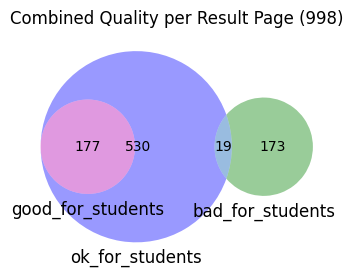

In [46]:
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

columns = ["good_for_students", "bad_for_students", "ok_for_students"]

plt.figure(figsize=(4, 4))
venn3(
    [set(results_sources[results_sources[column]].index) for column in columns],
    set_labels=columns,
)
plt.title(f"Combined Quality per Result Page ({len(results_sources)})")
plt.show()

In [47]:
results_sources.loc[results_sources["good_for_students"] & results_sources["bad_for_students"]]

Empty DataFrame
Columns: [Bron: Thumbs up?, Titel resultaat, Ranking, Link/resultaat, Query, Relevant?, vrije tags page, Bronnen DB, Bron: Inst/Bedrijf, Toegankelijkheid doelgroep (indruk), Soort Resultaat, Bron: Vrije labels, Bron: Commerciality, Bron: Sector, Q: soort, Bron: reclame, Opmerking, Q: Ranking vrije labels, Bron: doel, Bron: Trackers, OnderzoekNr, Related to Bronnen DB test (Resultaten DB), Bronnen: URL domein, Query: Video Schooltv, Created by_source, Bron-Status, Bron: Onderwerp, URL Domein, Conclusie over doel vd bron, Thumbs up 8-14?, Sector, Reclame, Vrije labels bron/onderwerp, uBlocked trackers, Commercialiteit, Onderwerpen, Div Labels NGO, Status, About page,  Notes, Kwaliteit_about, Instelling/Bedrijf/Persoon, Resultaten: vrije labels, Moederbedrijf DB, onderzoekNR, Toegankelijkheidspagina, Resultaten DB, Extra URL, Created time, Created by_result, URL Moederbedrijf, SlimZ Resultaten DB, Resultaten: toegankelijkheid, Cookie info page, More examples, Related to Resultaten DB 01 (1) (Bronnen DB), Res: Ranking, Res: soort result , ok_for_students, good_for_students, bad_for_students]
Index: []

[0 rows x 61 columns]

In [48]:
results_sources.loc[results_sources["ok_for_students"] & results_sources["bad_for_students"]]

Bron: Thumbs up?                                    Titel resultaat  \
58      Just-in-case  Vertrekhal Schiphol » Alle Info over de Schiph...   
99      Just-in-case                   Schotse - 2 definities - Encyclo   
133     Just-in-case                    Galei - 18 definities - Encyclo   
168     Just-in-case                  Trilling - 8 definities - Encyclo   
196     Just-in-case                    Schots - 7 definities - Encyclo   
311          Twijfel  Super Grappige En Schattige Paarden Filmpjes |...   
315     Just-in-case                    Sloot - 15 definities - Encyclo   
338     Just-in-case  Braziliaanse voetballegende Pelé op 82-jarige ...   
595          Twijfel             Fairtrade Max Havelaar - Allesduurzaam   
596     Just-in-case  Het bruist in België: zo viert koning Filip zi...   
599     Just-in-case                                  Geld | RTL Nieuws   
664     Just-in-case  Nog een mensensoort ontdekt in ons DNA | RTL N...   
675     Just-in-case                   Orgaan - 25 definities - Encyclo   
731     Just-in-case          Groot Barrièrerif — Google Arts & Culture   
748     Just-in-case                   Foetus - 22 definities - Encyclo   
750     Just-in-case                             Autosport | RTL Nieuws   
860     Just-in-case                       Spiere - definitie - Encyclo   
946     Just-in-case  Correct gebruik van aanhalingstekens – Correct...   
985     Just-in-case                        Prinses Amalia | RTL Nieuws   

     Ranking                                     Link/resultaat  \
58         1  https://www.vliegenenparkeren.nl/blog/vertrekh...   
99         1  https://www.encyclo.nl/begrip/schotse#:~:text=...   
133        2                https://www.encyclo.nl/begrip/galei   
168        2             https://www.encyclo.nl/begrip/trilling   
196        2               https://www.encyclo.nl/begrip/schots   
311        4        https://www.youtube.com/watch?v=kqzTVEKqRnM   
315        4                https://www.encyclo.nl/begrip/sloot   
338        4  https://www.rtlnieuws.nl/sport/voetbal/artikel...   
595        6  https://www.allesduurzaam.nl/keurmerken/keurme...   
596        6  https://www.rtlnieuws.nl/entertainment/royalty...   
599        7  https://www.rtlnieuws.nl/tags/onderwerpen/econ...   
664        7  https://www.rtlnieuws.nl/nieuws/buitenland/art...   
675        7               https://www.encyclo.nl/begrip/orgaan   
731        8  https://artsandculture.google.com/entity/m0jbx...   
748        8               https://www.encyclo.nl/begrip/foetus   
750        8  https://www.rtlnieuws.nl/tags/onderwerpen/spor...   
860        9               https://www.encyclo.nl/begrip/spiere   
946       10  https://www.correctnederlands.nl/correct-gebru...   
985       11  https://www.rtlnieuws.nl/tags/personen/prinses...   

                                          Query      Relevant?  \
58                   vertrekhal met inchekbalie       relevant   
99                         wat betekent schotse       relevant   
133                                       galei       relevant   
168                                    trilling       relevant   
196                        wat betekent schotse  niet_relevant   
311                           video van paarden       relevant   
315                                       sloot       relevant   
338  braziliaanse voetballegende pele overleden       relevant   
595                                keurmerk max       relevant   
596                         koning van belgieje       relevant   
599                                        geld       relevant   
664       welke stammen zijn er in sierra leone       relevant   
675                            Wat zijn organen       relevant   
731                         het groot Barrierif       relevant   
748                          wat is een foetus?       relevant   
750                                   autosport       relevant   
860                                     

### Vrije Labels

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '19'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '38'),
 Text(0, 0, '38'),
 Text(0, 0, '41'),
 Text(0, 0, '43'),
 Text(0, 0, '45'),
 Text(0, 0, '47'),
 Text(0, 0, '50'),
 Text(0, 0, '56'),
 Text(0, 0, '59'),
 Text(0, 0, '62'),
 Text(0, 0, '64'),
 Text(0, 0, '74'),
 Text(0, 0, '77'),
 Text(0, 0, '81'),
 Text(0, 0, '84'),
 Text(0, 0, '99'),
 Text(0, 0, '132'),
 Text(0, 0

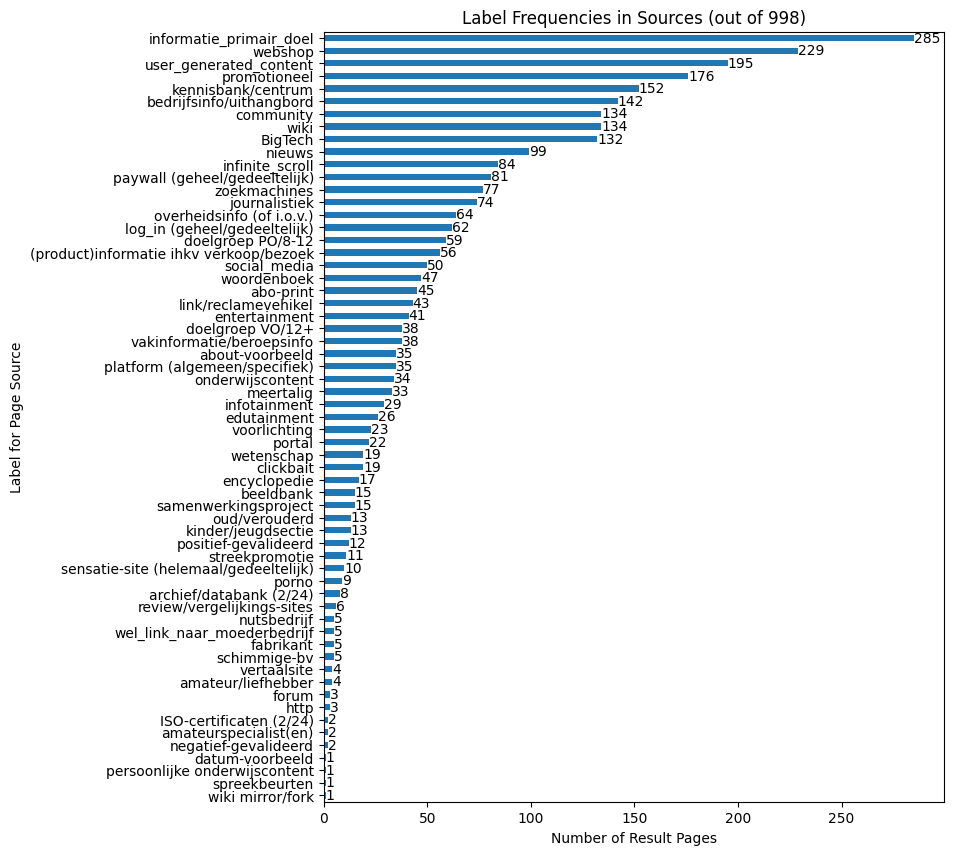

In [49]:
column = "Vrije labels bron/onderwerp"

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel="Label for Page Source",
        figsize=(8, 10),
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '19'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '38'),
 Text(0, 0, '38'),
 Text(0, 0, '41'),
 Text(0, 0, '43'),
 Text(0, 0, '45'),
 Text(0, 0, '47'),
 Text(0, 0, '50'),
 Text(0, 0, '56'),
 Text(0, 0, '59'),
 Text(0, 0, '62'),
 Text(0, 0, '64'),
 Text(0, 0, '74'),
 Text(0, 0, '77'),
 Text(0, 0, '81'),
 Text(0, 0, '84'),
 Text(0, 0, '99'),
 Text(0, 0, '132'),
 Text(0, 0, '134'),
 Text(0, 0, '134'),
 Text(0, 0, '142'),
 Text(0, 0, '152'),
 Text(0, 0, '176'),
 Text(0, 0, '195'),
 Text(0, 0, '229'),
 Text(0, 0, '285')]

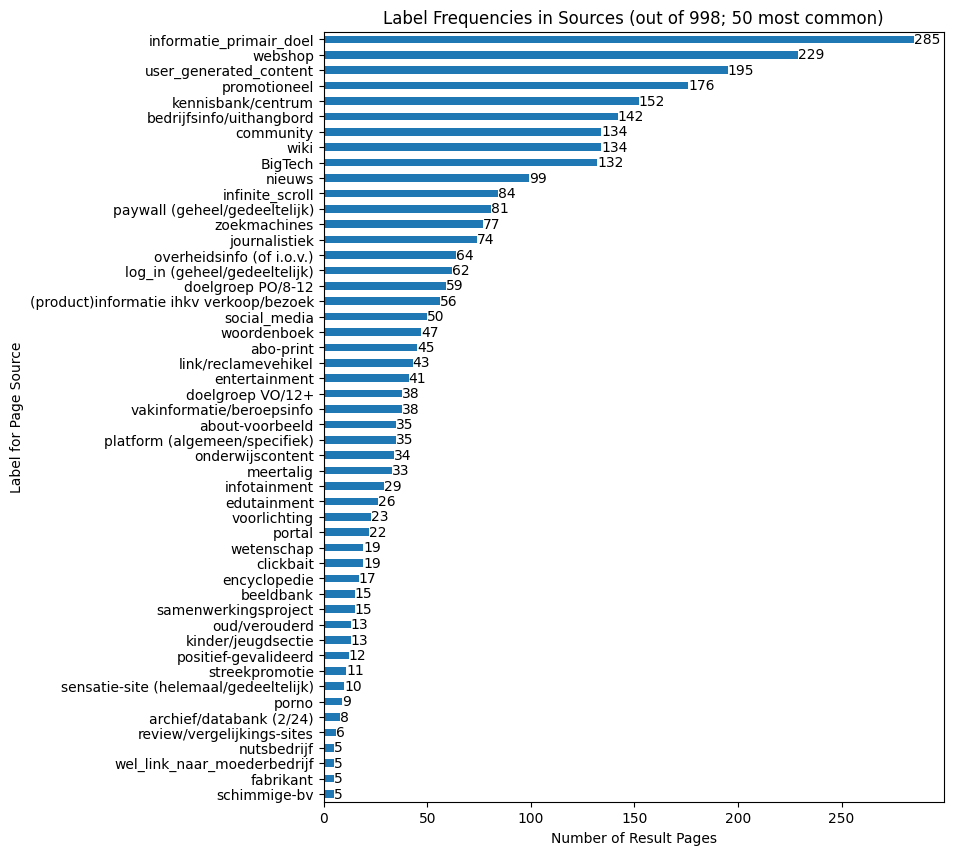

In [50]:
k = 50

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results_sources)}; {k} most common)",
        xlabel="Number of Result Pages",
        ylabel="Label for Page Source",
        figsize=(8, 10),
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '99'),
 Text(0, 0, '132'),
 Text(0, 0, '134'),
 Text(0, 0, '134'),
 Text(0, 0, '142'),
 Text(0, 0, '152'),
 Text(0, 0, '176'),
 Text(0, 0, '195'),
 Text(0, 0, '229'),
 Text(0, 0, '285')]

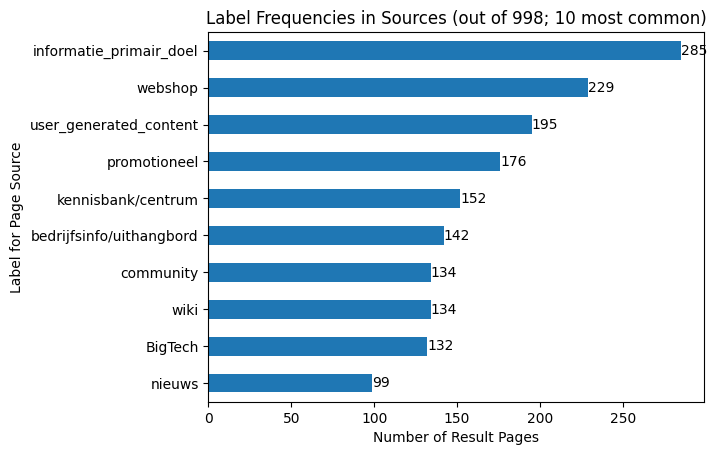

In [51]:
k = 10

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results_sources)}; {k} most common)",
        xlabel="Number of Result Pages",
        ylabel="Label for Page Source",
    )
)

ax.bar_label(ax.containers[0])

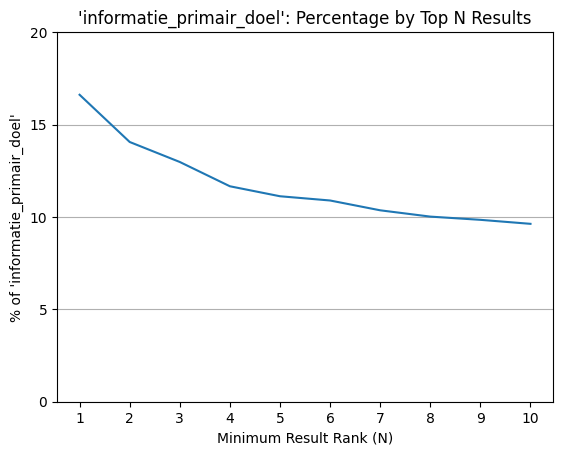

In [52]:
counts: dict[int, float] = {}
category = "informatie_primair_doel"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", category]).set_index("Ranking").plot(
    title=f"'{category}': Percentage by Top N Results",
    xlabel="Minimum Result Rank (N)",
    ylabel=f"% of '{category}'",
    xticks=range(1, 11),
    yticks=range(0, 25, 5),
    legend=False,
).grid(axis="y")

### Result Sources

[Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0

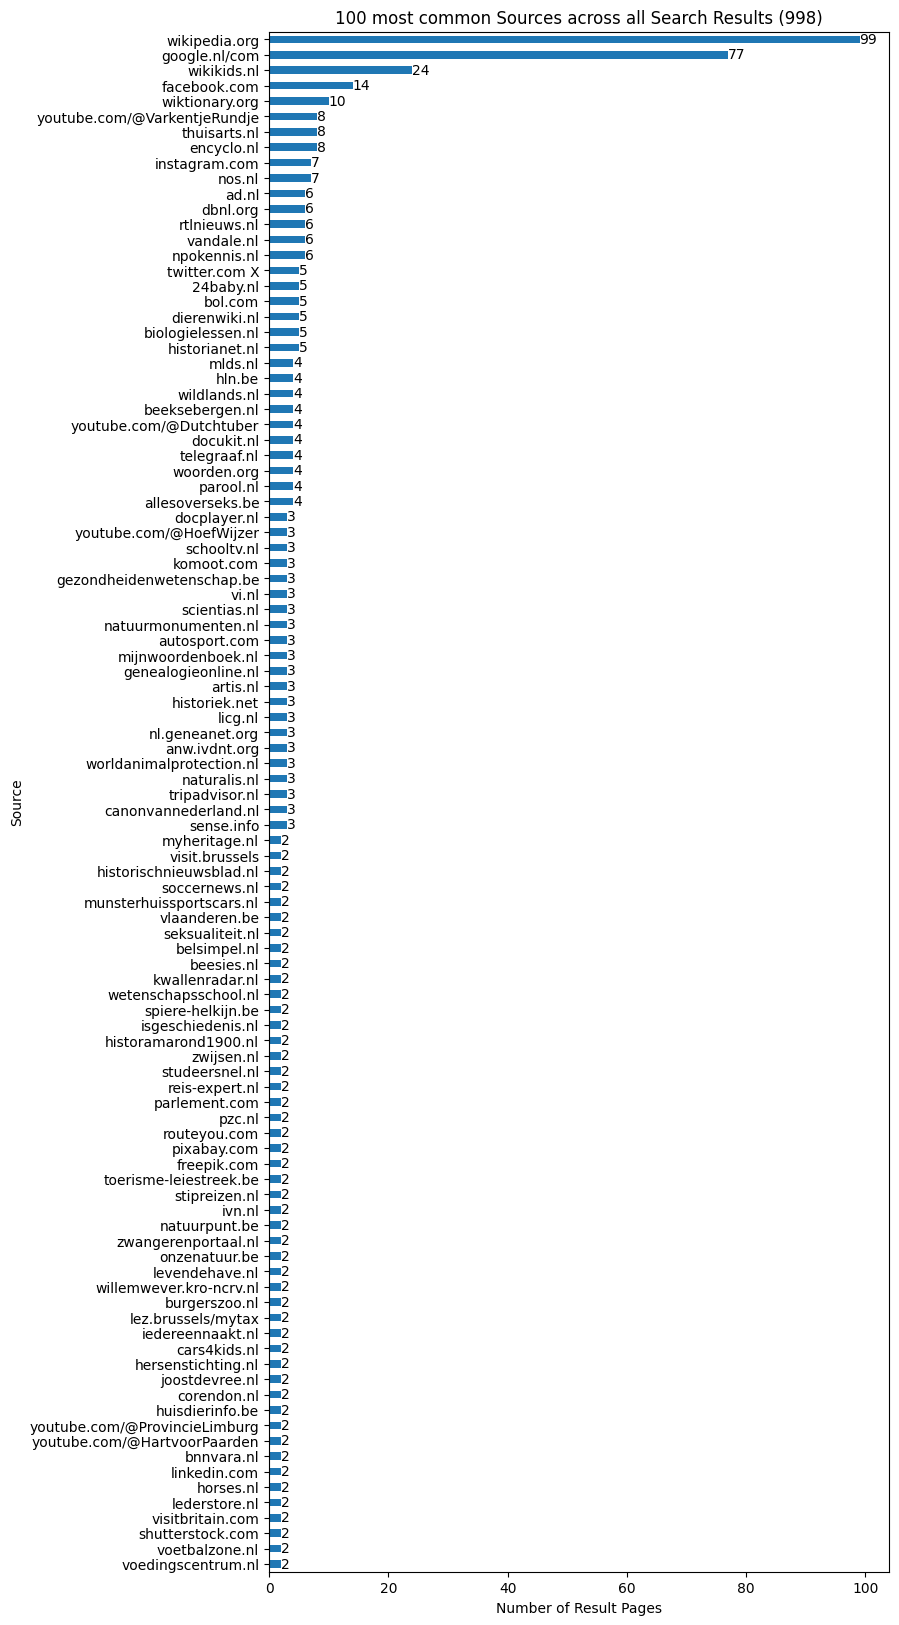

In [53]:
k = 100

ax = (
    results["Bronnen DB"]
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across all Search Results ({len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '14'),
 Text(0, 0, '24'),
 Text(0, 0, '77'),
 Text(0, 0, '99')]

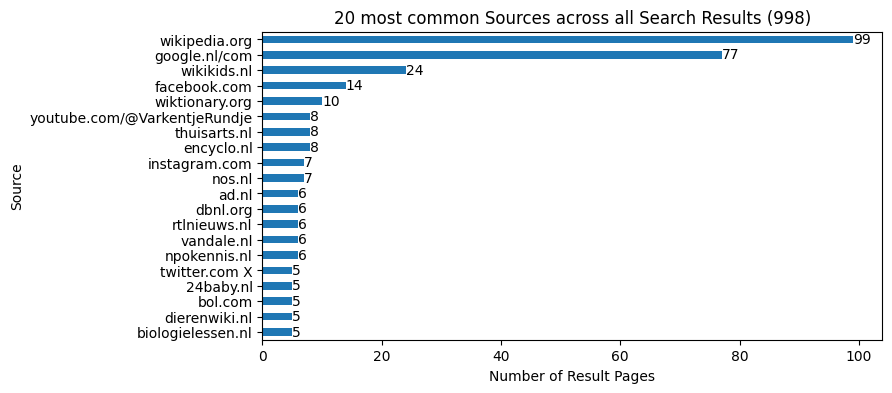

In [54]:
k = 20

ax = (
    results["Bronnen DB"]
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across all Search Results ({len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '14'),
 Text(0, 0, '24'),
 Text(0, 0, '77'),
 Text(0, 0, '99')]

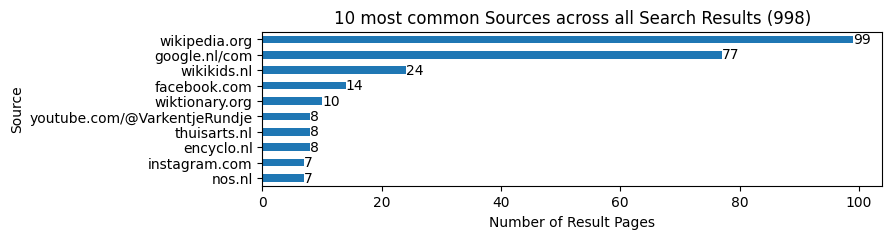

In [127]:
k = 10

ax = (
    results["Bronnen DB"]
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across all Search Results ({len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '10'),
 Text(0, 0, '53'),
 Text(0, 0, '83')]

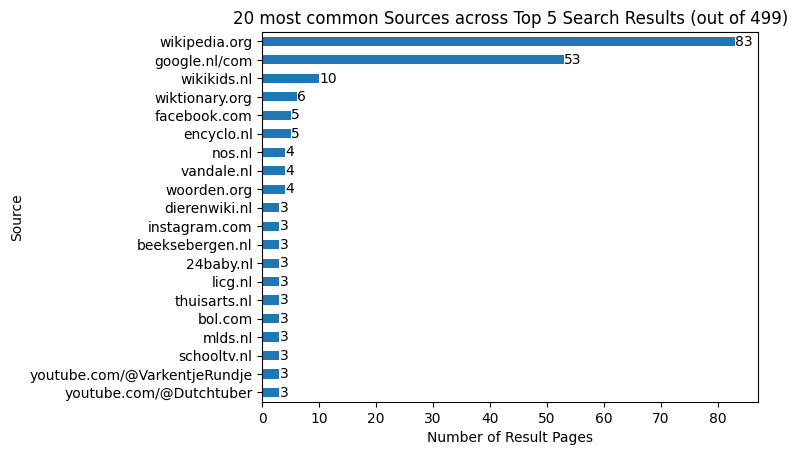

In [56]:
n = 5
_results = results.loc[results["Ranking"] <= n]
k = 20

ax = (
    _results["Bronnen DB"]
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        # figsize=(8, k // 5),
        title=f"{k} most common Sources across Top {n} Search Results (out of {len(_results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '37')]

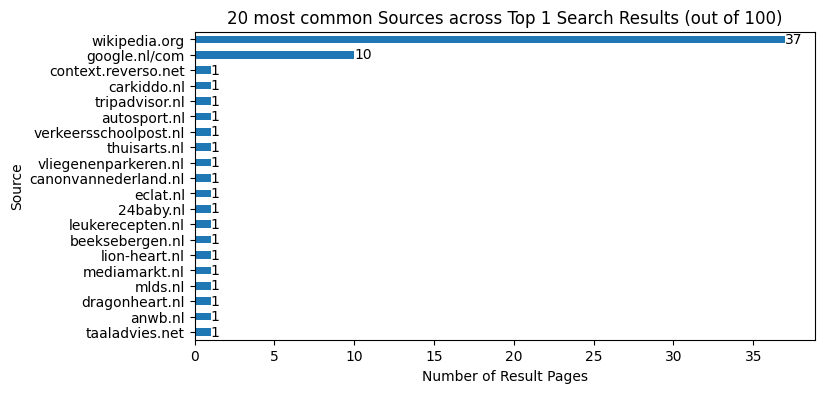

In [57]:
n = 1
_results = results.loc[results["Ranking"] <= n]
k = 20

ax = (
    _results["Bronnen DB"]
    .value_counts()[:k]
    .sort_values(ascending=True)
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across Top {n} Search Results (out of {len(_results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '37')]

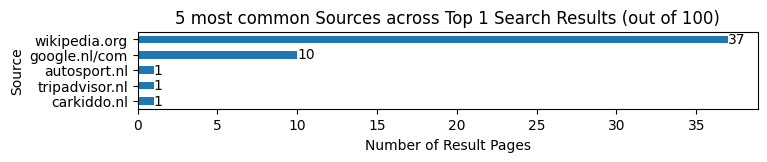

In [58]:
n = 1
_results = results.loc[results["Ranking"] <= n]
k = 5

ax = (
    _results["Bronnen DB"]
    .value_counts()[:k]
    .sort_values(ascending=True)
    .plot(
        kind="barh",
        figsize=(8, k // 5),
        title=f"{k} most common Sources across Top {n} Search Results (out of {len(_results)})",
        xlabel="Number of Result Pages",
        ylabel="Source",
    )
)

ax.bar_label(ax.containers[0])

In [59]:
# wikikids.nl results never appears on first rank:

results.loc[(results["Bronnen DB"] == ("wikikids.nl")) & (results["Ranking"] <= 1)]

Empty DataFrame
Columns: [Bron: Thumbs up?, Titel resultaat, Ranking, Link/resultaat, Query, Relevant?, vrije tags page, Bronnen DB, Bron: Inst/Bedrijf, Toegankelijkheid doelgroep (indruk), Soort Resultaat, Bron: Vrije labels, Bron: Commerciality, Bron: Sector, Q: soort, Bron: reclame, Opmerking, Q: Ranking vrije labels, Bron: doel, Bron: Trackers, OnderzoekNr, Related to Bronnen DB test (Resultaten DB), Bronnen: URL domein, Query: Video Schooltv, Created by, Bron-Status, Bron: Onderwerp]
Index: []

[0 rows x 27 columns]

[Text(0, 0, '1'), Text(0, 0, '11'), Text(0, 0, '24'), Text(0, 0, '27')]

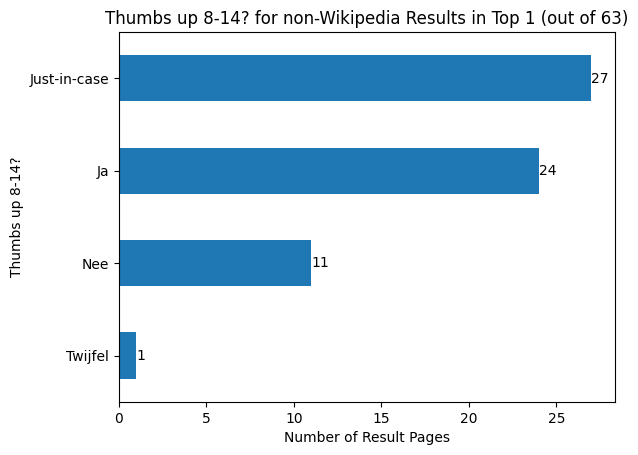

In [60]:
niet_wikipedia_rank_1 = results_sources.loc[
    (results["Bronnen DB"] != ("wikipedia.org")) & (results["Ranking"] <= 1)
]
ax = (
    niet_wikipedia_rank_1["Thumbs up 8-14?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Thumbs up 8-14? for non-Wikipedia Results in Top 1 (out of {len(niet_wikipedia_rank_1)})",
        xlabel="Number of Result Pages",
    )
)
ax.bar_label(ax.containers[0])

### Result Types (Informativeness)

In [61]:
column = "Soort Resultaat"

values = results_sources[column].unique()

counts = (
    results_sources.groupby("Query")
    .value_counts(subset=[column], normalize=True)
    .unstack(level=column)
)

counts

Soort Resultaat                             informatief  navigational  \
Query                                                                   
De gouverneur van limburg                      0.900000      0.100000   
De smurfen                                     0.200000      0.400000   
Dierentuin                                     1.000000           NaN   
Ezel                                           0.700000           NaN   
Hoe komen straatkinderen aan eten              1.000000           NaN   
...                                                 ...           ...   
welken gebouwen zijn er in West-Vlaanderen     0.800000      0.200000   
westerschelde waternoodsramp                   0.900000      0.100000   
wist je dat?                                   1.000000           NaN   
zebra                                          0.636364      0.272727   
zebrahaai                                      0.600000      0.300000   

Soort Resultaat                             transactional  
Query                                                      
De gouverneur van limburg                             NaN  
De smurfen                                       0.400000  
Dierentuin                                            NaN  
Ezel                                             0.300000  
Hoe komen straatkinderen aan eten                     NaN  
...                                                   ...  
welken gebouwen zijn er in West-Vlaanderen            NaN  
westerschelde waternoodsramp                          NaN  
wist je dat?                                          NaN  
zebra                                            0.090909  
zebrahaai                                        0.100000  

[100 rows x 3 columns]

In [62]:
width = 120

for col in counts.columns:
    print("=" * 20 + col + "=" * 20)
    with pd.option_context("display.width", width, "display.min_rows", 50):
        print(counts.sort_values(by=col, ascending=False))
    print("=" * width)

====================informatief====================
Soort Resultaat                                     informatief  navigational  transactional
Query                                                                                       
mens red peuter van dak racist                         1.000000           NaN            NaN
wist je dat?                                           1.000000           NaN            NaN
waar leven giraffen                                    1.000000           NaN            NaN
wat betekent schotse                                   1.000000           NaN            NaN
wat is een begin aanhaling                             1.000000           NaN            NaN
elektronen                                             1.000000           NaN            NaN
ik wil iemand een bericht steuren                      1.000000           NaN            NaN
wat is een foetus?                                     1.000000           NaN            NaN
voortplanting     

[Text(0, 0, '138'), Text(0, 0, '181'), Text(0, 0, '679')]

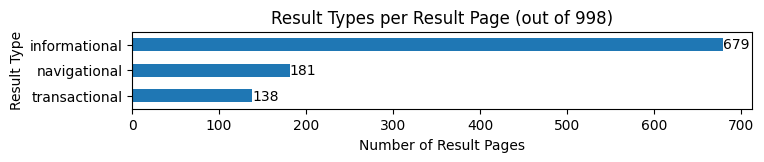

In [63]:
column = "Soort Resultaat"

informativeness = results[column].value_counts(ascending=True)
informativeness.index = ["transactional", "navigational", "informational"]

ax = informativeness.plot(
    kind="barh",
    title=f"Result Types per Result Page (out of {len(results)})",
    xlabel="Number of Result Pages",
    ylabel="Result Type",
    figsize=(8, 1),
)
ax.bar_label(ax.containers[0])

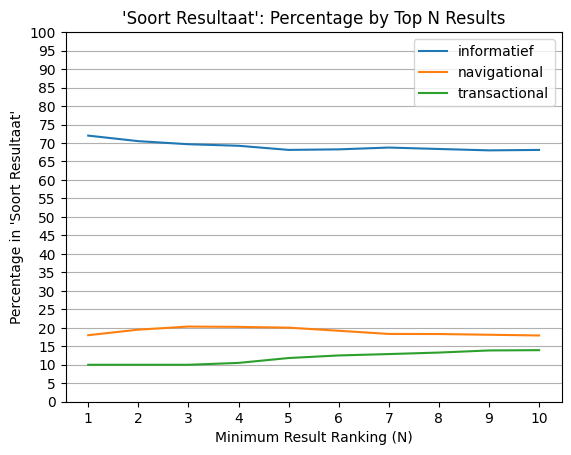

In [64]:
value_counts: dict = {}


for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 105, 5),
    legend=True,
).grid(axis="y")

### Result Relevance

In [65]:
relevance_counts = results["Relevant?"].value_counts(ascending=True)
relevance_counts

Relevant?
404                1
misschien         53
niet_relevant    117
relevant         827
Name: count, dtype: int64

In [66]:
relevance_counts.index = ["Error 404", "partially_relevant", "irrelevant", "relevant"]
relevance_counts

Error 404               1
partially_relevant     53
irrelevant            117
relevant              827
Name: count, dtype: int64

[Text(0, 0, '1'), Text(0, 0, '53'), Text(0, 0, '117'), Text(0, 0, '827')]

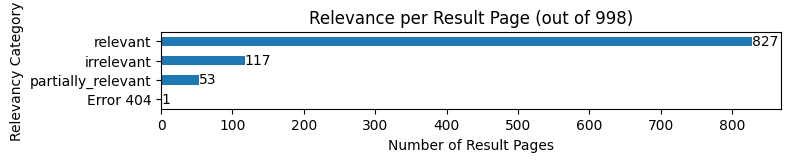

In [67]:
ax = relevance_counts.plot(
    kind="barh",
    title=f"Relevance per Result Page (out of {len(results)})",
    xlabel="Number of Result Pages",
    ylabel="Relevancy Category",
    figsize=(8, 1),
)
ax.bar_label(ax.containers[0])

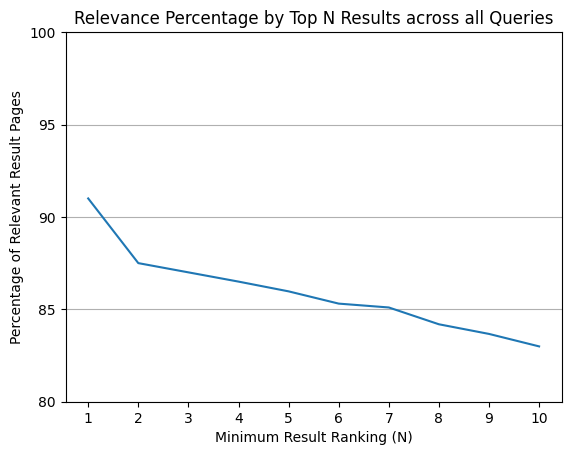

In [68]:
counts: dict[int, float] = {}

for n in range(1, 11):
    _results = results.loc[results["Ranking"] <= n]
    counts[n] = _results["Relevant?"].value_counts(normalize=True)["relevant"] * 100

pd.DataFrame(counts.items(), columns=["Ranking", "Relevance"]).set_index(
    "Ranking"
).plot(
    title="Relevance Percentage by Top N Results across all Queries",
    xlabel="Minimum Result Ranking (N)",
    ylabel="Percentage of Relevant Result Pages",
    xticks=range(1, 11),
    yticks=range(80, 105, 5),
    legend=False,
).grid(axis="y")

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_9370/1192633478.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.DataFrame.from_dict(value_counts, orient="index").fillna(


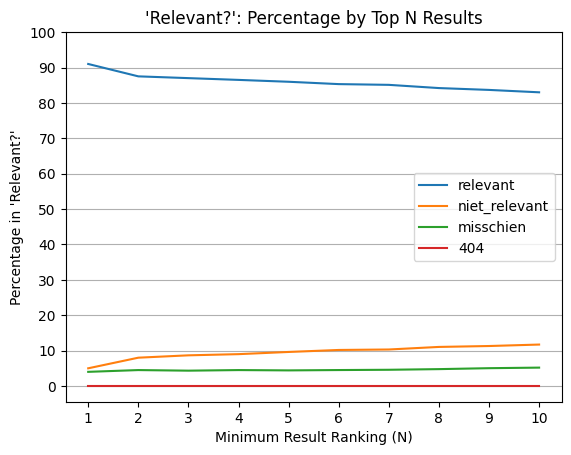

In [69]:
value_counts: dict = {}

column = "Relevant?"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[:k]
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").fillna(
    method="bfill"
).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 101, 10),
    legend=True,
).grid(axis="y")

### Result Accessibility

[Text(0, 0, '10'),
 Text(0, 0, '55'),
 Text(0, 0, '300'),
 Text(0, 0, '302'),
 Text(0, 0, '331')]

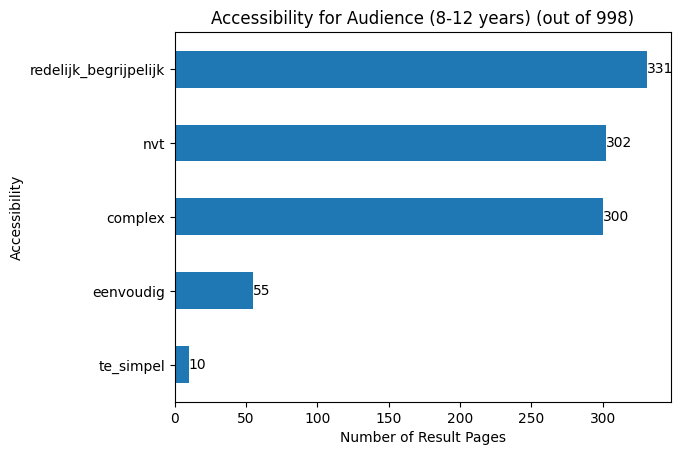

In [70]:
ax = (
    results["Toegankelijkheid doelgroep (indruk)"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Accessibility for Audience (8-12 years) (out of {len(results)})",
        xlabel="Number of Result Pages",
        ylabel="Accessibility",
    )
)
ax.bar_label(ax.containers[0])

### Results Commerciality

[Text(0, 0, '53'), Text(0, 0, '416'), Text(0, 0, '528')]

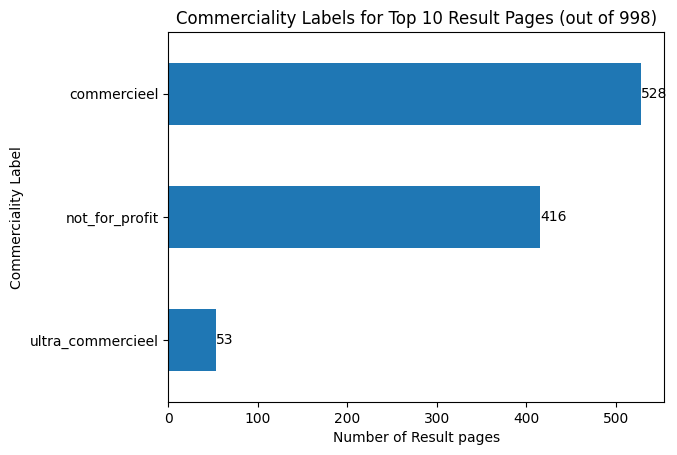

In [71]:
n=10

ax = (
    results_sources["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality Labels for Top {n} Result Pages (out of {len(results_sources)})",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '18'), Text(0, 0, '228'), Text(0, 0, '252')]

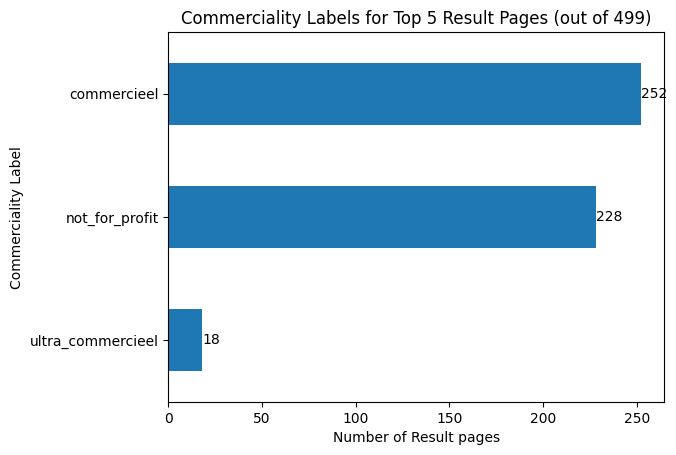

In [72]:
n = 5
_results = results_sources.loc[results["Ranking"] <= n]

ax = (
    _results["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality Labels for Top {n} Result Pages (out of {len(_results)})",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'), Text(0, 0, '36'), Text(0, 0, '63')]

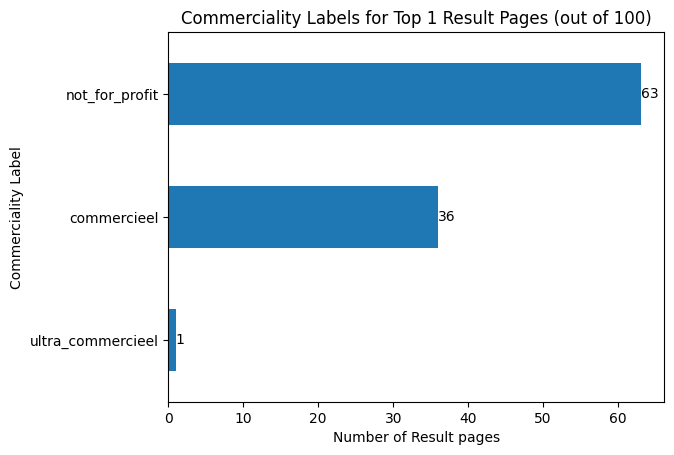

In [73]:
n = 1
_results = results_sources.loc[results["Ranking"] <= n]

ax = (
    _results["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality Labels for Top {n} Result Pages (out of {len(_results)})",
        xlabel="Number of Result pages",
        ylabel="Commerciality Label",
    )
)
ax.bar_label(ax.containers[0])

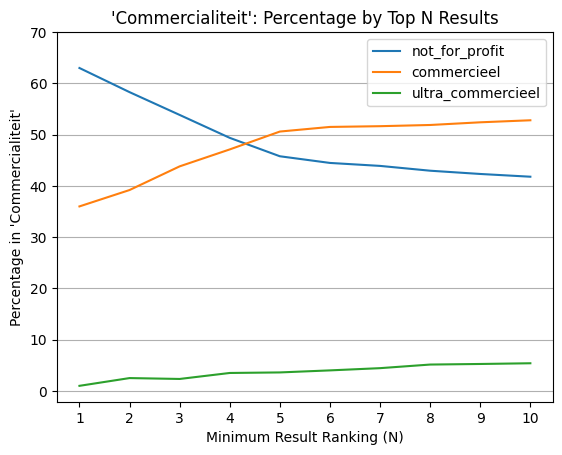

In [74]:
value_counts: dict = {}
column = "Commercialiteit"


for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").fillna(0).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 75, 10),
    legend=True,
).grid(axis="y")

### Result Sectors

[Text(0, 0, '9'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '18'),
 Text(0, 0, '18'),
 Text(0, 0, '21'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '33'),
 Text(0, 0, '35'),
 Text(0, 0, '37'),
 Text(0, 0, '38'),
 Text(0, 0, '69'),
 Text(0, 0, '77'),
 Text(0, 0, '95'),
 Text(0, 0, '106'),
 Text(0, 0, '140'),
 Text(0, 0, '165')]

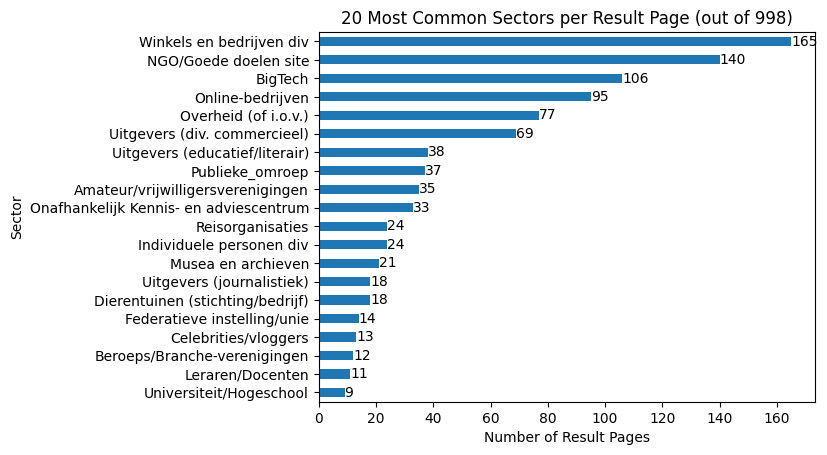

In [75]:
k = 20

ax = (
    results_sources["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} Most Common Sectors per Result Page (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '31'),
 Text(0, 0, '32'),
 Text(0, 0, '40'),
 Text(0, 0, '63'),
 Text(0, 0, '72'),
 Text(0, 0, '106')]

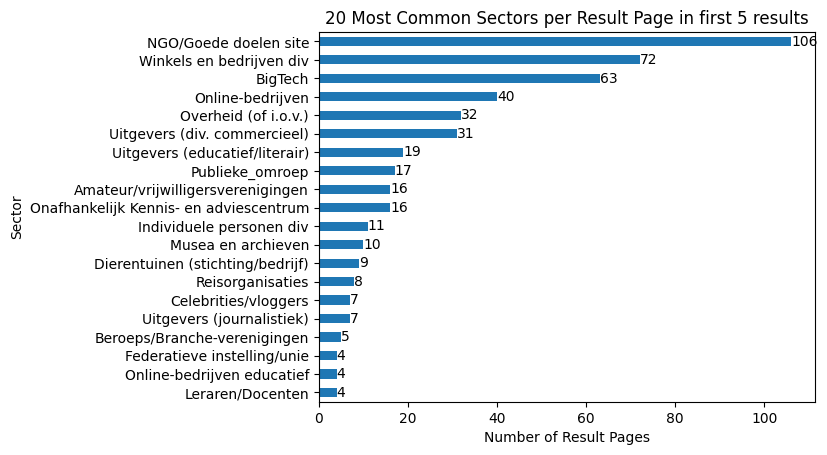

In [76]:
n = 5
k = 20
ax = (
    results_sources.loc[results_sources["Ranking"] <= n]["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} Most Common Sectors per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '41')]

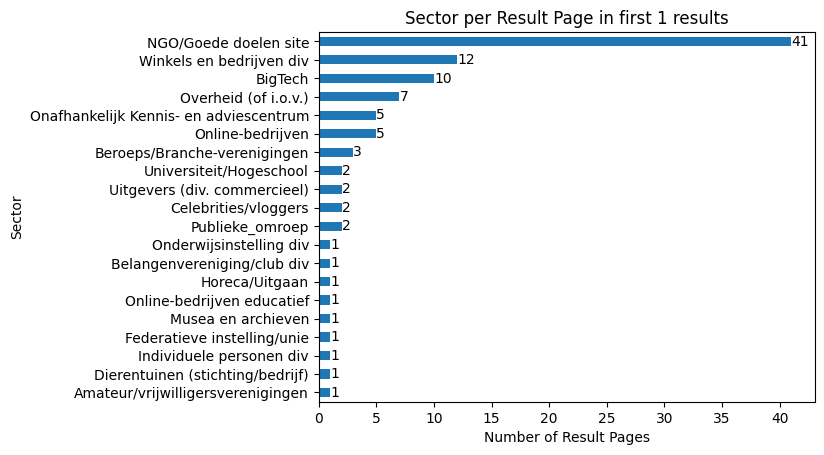

In [77]:
n = 1
ax = (
    results_sources.loc[results_sources["Ranking"] <= n]["Sector"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Sector per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel="Sector",
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_9370/978984602.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.DataFrame.from_dict(value_counts, orient="index").fillna(


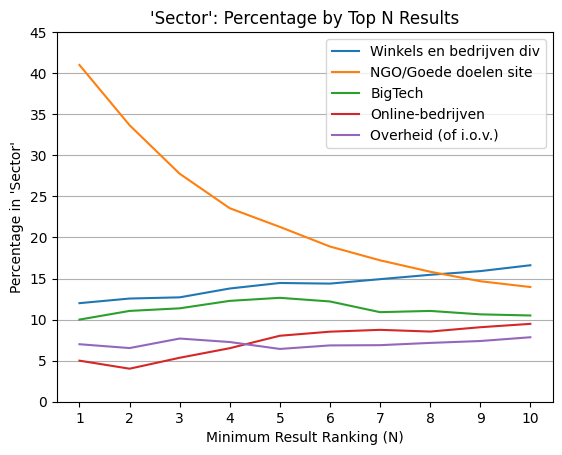

In [78]:
value_counts: dict = {}
k = 5
column = "Sector"

top_sectors = results_sources[column].value_counts()[:k].index

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[top_sectors]
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").fillna(
    method="ffill"
).sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 50, 5),
    legend=True,
).grid(axis="y")

### Thumbs-Up

[Text(0, 0, '25'), Text(0, 0, '232'), Text(0, 0, '360'), Text(0, 0, '380')]

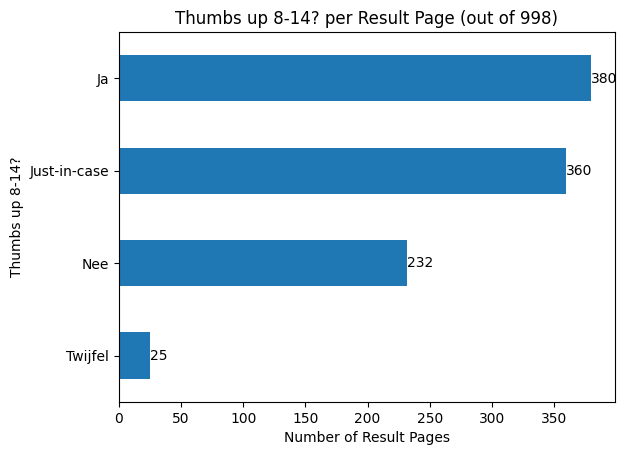

In [79]:
column = "Thumbs up 8-14?"

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per Result Page (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '7'), Text(0, 0, '99'), Text(0, 0, '178'), Text(0, 0, '214')]

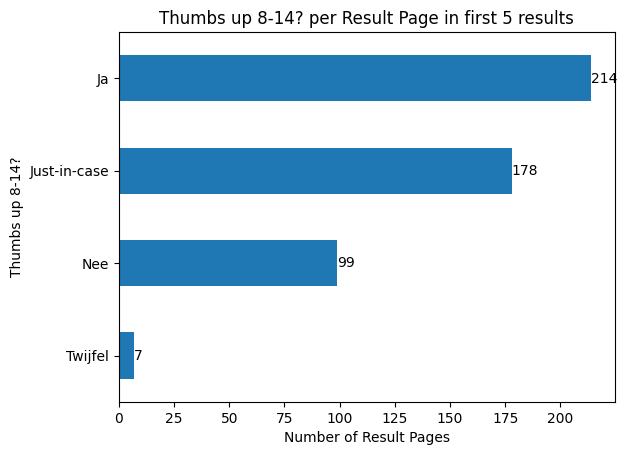

In [80]:
column = "Thumbs up 8-14?"
n = 5

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'), Text(0, 0, '11'), Text(0, 0, '27'), Text(0, 0, '61')]

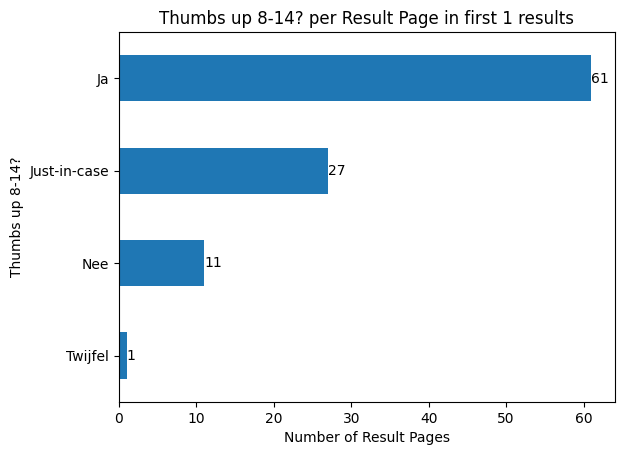

In [81]:
column = "Thumbs up 8-14?"
n = 1

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per Result Page in first {n} results",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

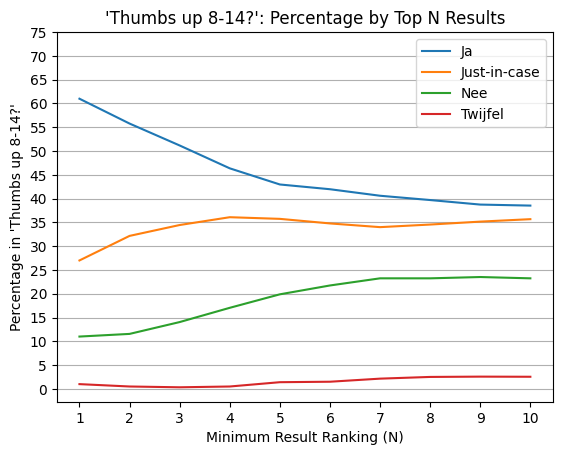

In [82]:
value_counts: dict = {}

categories = ["Ja", "Just-in-case"]
column = "Thumbs up 8-14?"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    value_counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)
        * 100
    )


pd.DataFrame.from_dict(value_counts, orient="index").sort_index().plot(
    title=f"'{column}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage in '{column}'",
    xticks=range(1, 11),
    yticks=range(0, 80, 5),
    legend=True,
).grid(axis="y")

### Goal

[Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '22'),
 Text(0, 0, '22'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '29'),
 Text(0, 0, '32'),
 Text(0, 0, '34'),
 Text(0, 0, '37'),
 Text(0, 0, '57'),
 Text(0, 0, '60'),
 Text(0, 0, '63'),
 Text(0, 0, '94'),
 Text(0, 0, '110'),
 Text(0, 0, '111'),
 Text(0, 0, '216')]

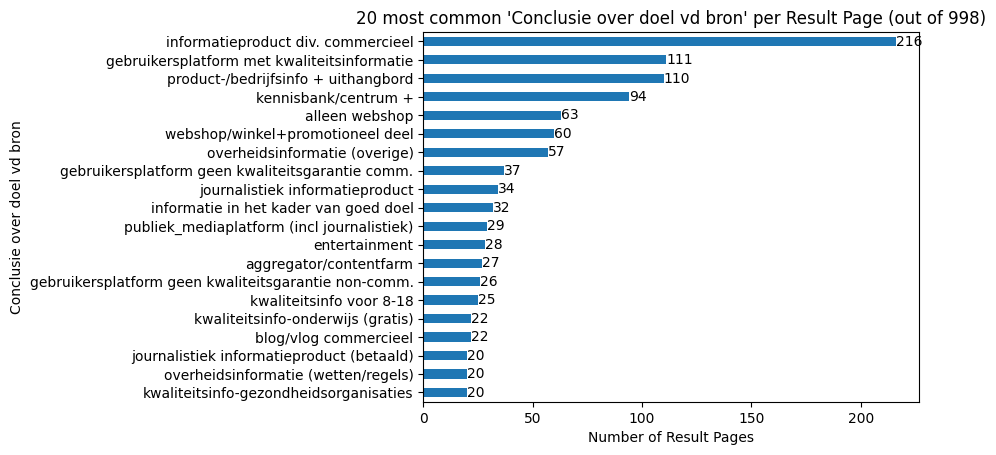

In [83]:
column = "Conclusie over doel vd bron"
k = 20

ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} most common '{column}' per Result Page (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '28'),
 Text(0, 0, '39'),
 Text(0, 0, '49'),
 Text(0, 0, '89'),
 Text(0, 0, '112')]

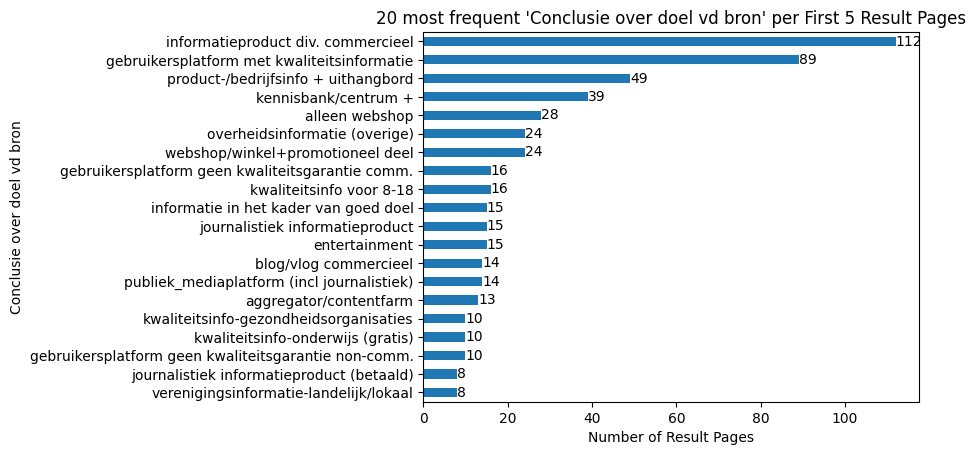

In [84]:
column = "Conclusie over doel vd bron"
n = 5

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} most frequent '{column}' per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '10'),
 Text(0, 0, '17'),
 Text(0, 0, '37')]

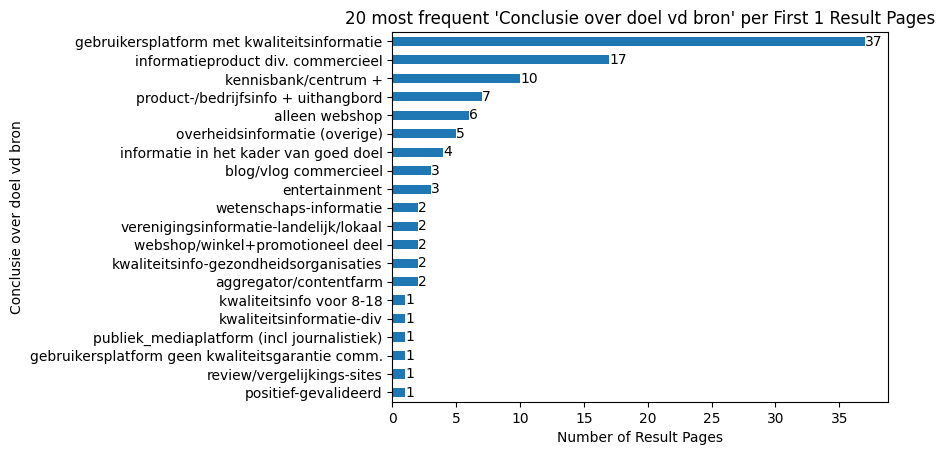

In [85]:
column = "Conclusie over doel vd bron"
n = 1
k = 20

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-k:]
    .plot(
        kind="barh",
        title=f"{k} most frequent '{column}' per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        # figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

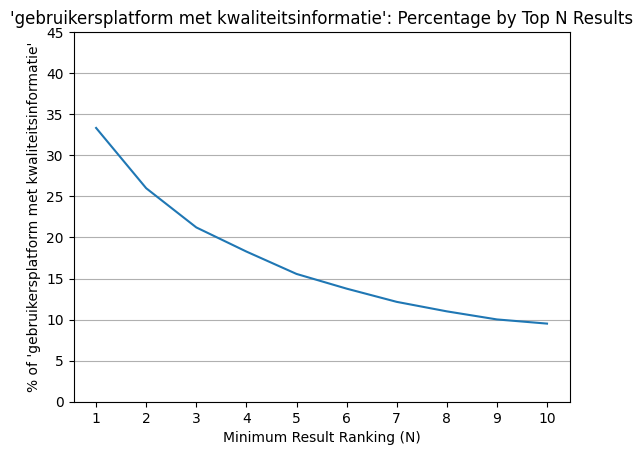

In [86]:
counts: dict[int, float] = {}
category = "gebruikersplatform met kwaliteitsinformatie"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", "Thumbs Up"]).set_index(
    "Ranking"
).plot(
    title=f"'{category}': Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"% of '{category}'",
    xticks=range(1, 11),
    yticks=range(0, 50, 5),
    legend=False,
).grid(axis="y")

### About Page

[Text(0, 0, '1'),
 Text(0, 0, '21'),
 Text(0, 0, '24'),
 Text(0, 0, '58'),
 Text(0, 0, '124'),
 Text(0, 0, '331'),
 Text(0, 0, '422')]

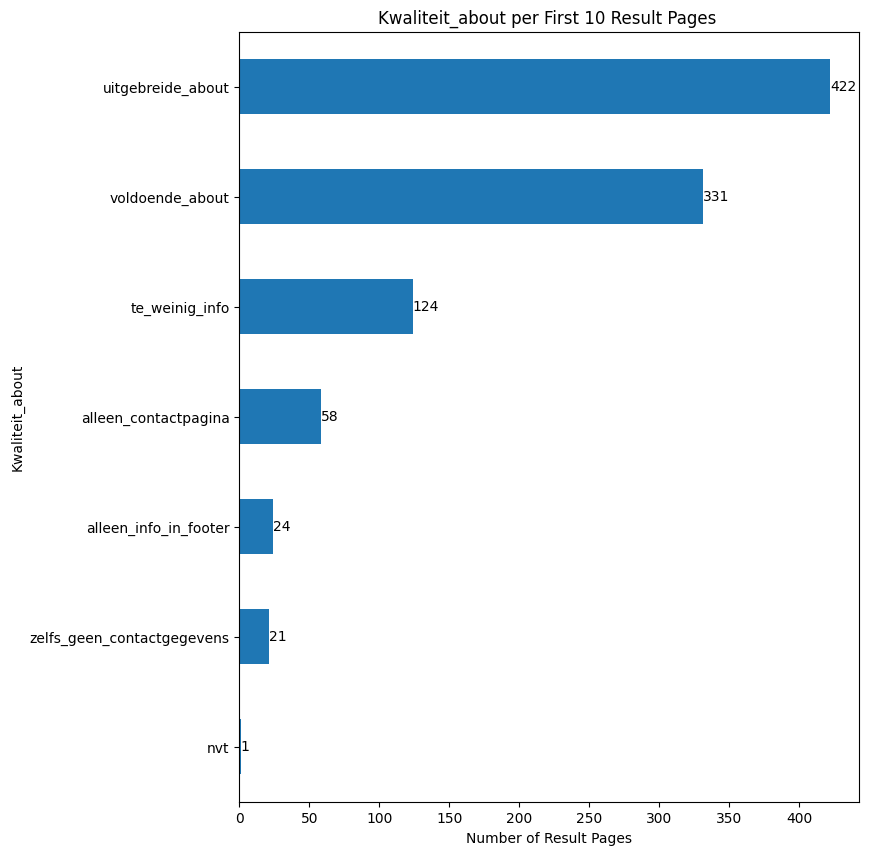

In [87]:
column = "Kwaliteit_about"
n = 10

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages ",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Ads

In [88]:
column = "Reclame"
n = 5

categories = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[-n:]
).index
categories

Index(['over_the_top_ads', 'limited_ads', 'many_ads', 'no_ads',
       'company_promotion'],
      dtype='object', name='Reclame')

[Text(0, 0, '39'),
 Text(0, 0, '75'),
 Text(0, 0, '200'),
 Text(0, 0, '363'),
 Text(0, 0, '395')]

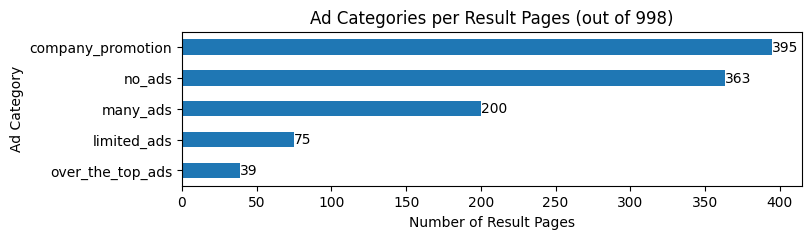

In [89]:
ax = (
    results_sources[column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)[categories]
    .plot(
        kind="barh",
        title=f"Ad Categories per Result Pages (out of {len(results_sources)})",
        xlabel="Number of Result Pages",
        ylabel="Ad Category",
        figsize=(8, 2)
        
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_9370/3293901513.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.DataFrame.from_dict(value_counts, orient="index").fillna(


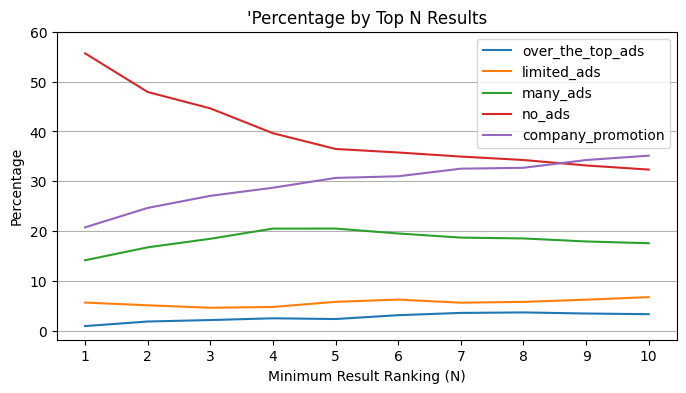

In [90]:
column = "Reclame"
n = 5

value_counts: dict = {}


for rank in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= rank]
    value_counts[rank] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[categories]
        * 100
    )

pd.DataFrame.from_dict(value_counts, orient="index").fillna(
    method="bfill"
).sort_index().plot(
    title=f"'Percentage by Top N Results",
    xlabel="Minimum Result Ranking (N)",
    ylabel=f"Percentage",
    xticks=range(1, 11),
    yticks=range(0, 61, 10),
    legend=True,
    figsize=(8, 4)
).grid(axis="y")

[Text(0, 0, '1'),
 Text(0, 0, '9'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '32'),
 Text(0, 0, '113'),
 Text(0, 0, '169'),
 Text(0, 0, '201')]

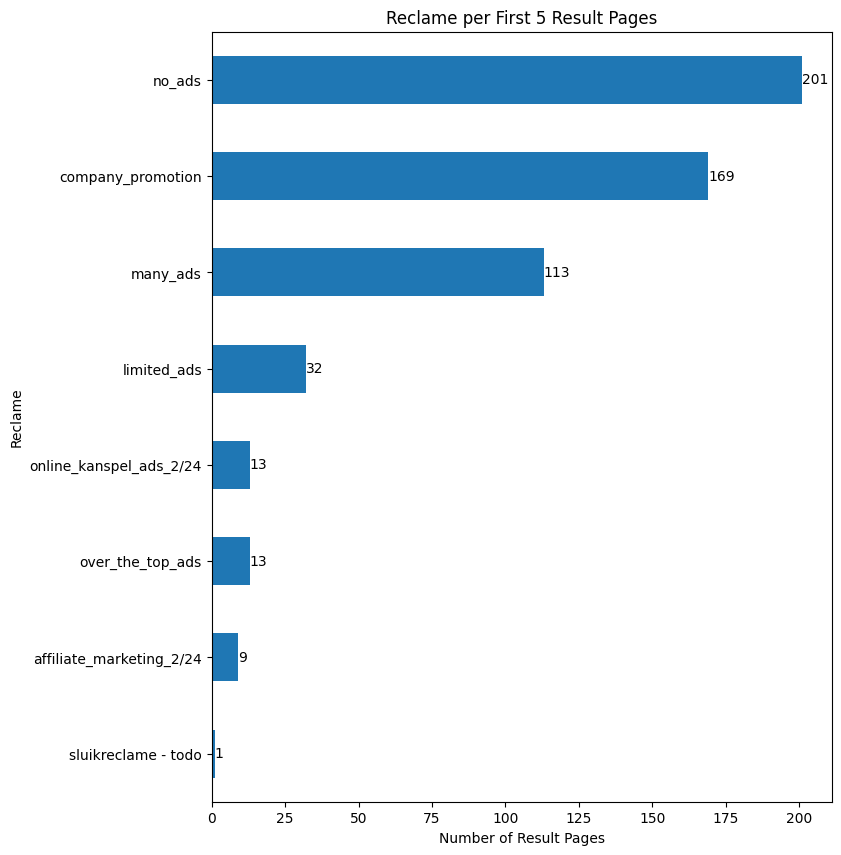

In [91]:
column = "Reclame"
n = 5

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '15'),
 Text(0, 0, '22'),
 Text(0, 0, '59')]

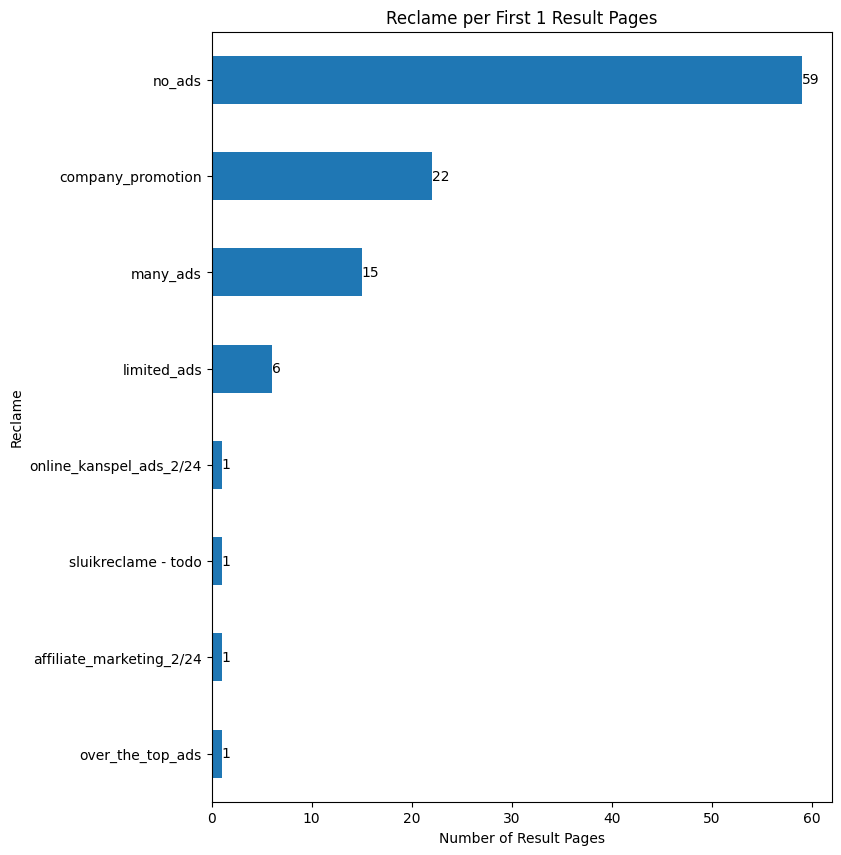

In [92]:
column = "Reclame"
n = 1

ax = (
    results_sources.loc[results_sources["Ranking"] <= n][column]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"{column} per First {n} Result Pages",
        xlabel="Number of Result Pages",
        ylabel=column,
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

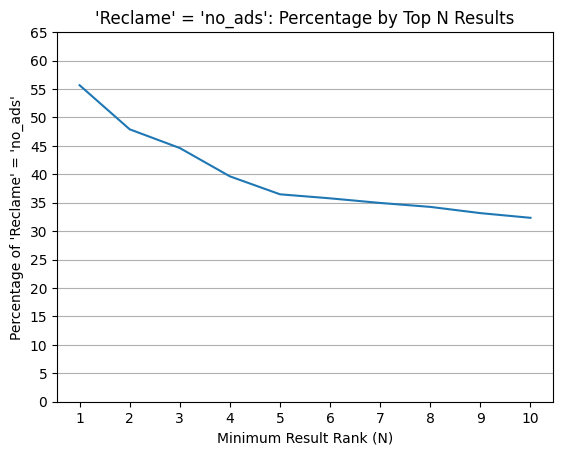

In [93]:
counts: dict[int, float] = {}
category = "no_ads"

for n in range(1, 11):
    _results = results_sources.loc[results_sources["Ranking"] <= n]
    counts[n] = (
        _results[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(normalize=True)[category]
        * 100
    )

pd.DataFrame(counts.items(), columns=["Ranking", category]).set_index("Ranking").plot(
    title=f"'{column}' = '{category}': Percentage by Top N Results",
    xlabel="Minimum Result Rank (N)",
    ylabel=f"Percentage of '{column}' = '{category}'",
    xticks=range(1, 11),
    yticks=range(0, 70, 5),
    legend=False,
).grid(axis="y")

## Sources

### Commerciality

[Text(0, 0, '17'), Text(0, 0, '197'), Text(0, 0, '328')]

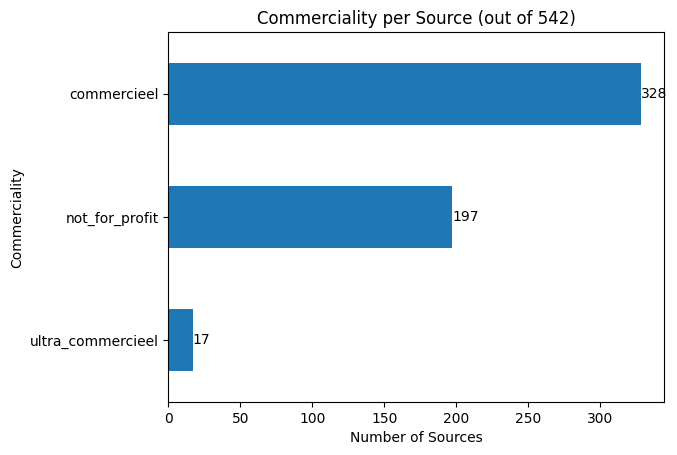

In [94]:
ax = (
    sources["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Commerciality",
    )
)
ax.bar_label(ax.containers[0])

### Sectors

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '19'),
 Text(0, 0, '21'),
 Text(0, 0, '23'),
 Text(0, 0, '32'),
 Text(0, 0, '35'),
 Text(0, 0, '57'),
 Text(0, 0, '67'),
 Text(0, 0, '144')]

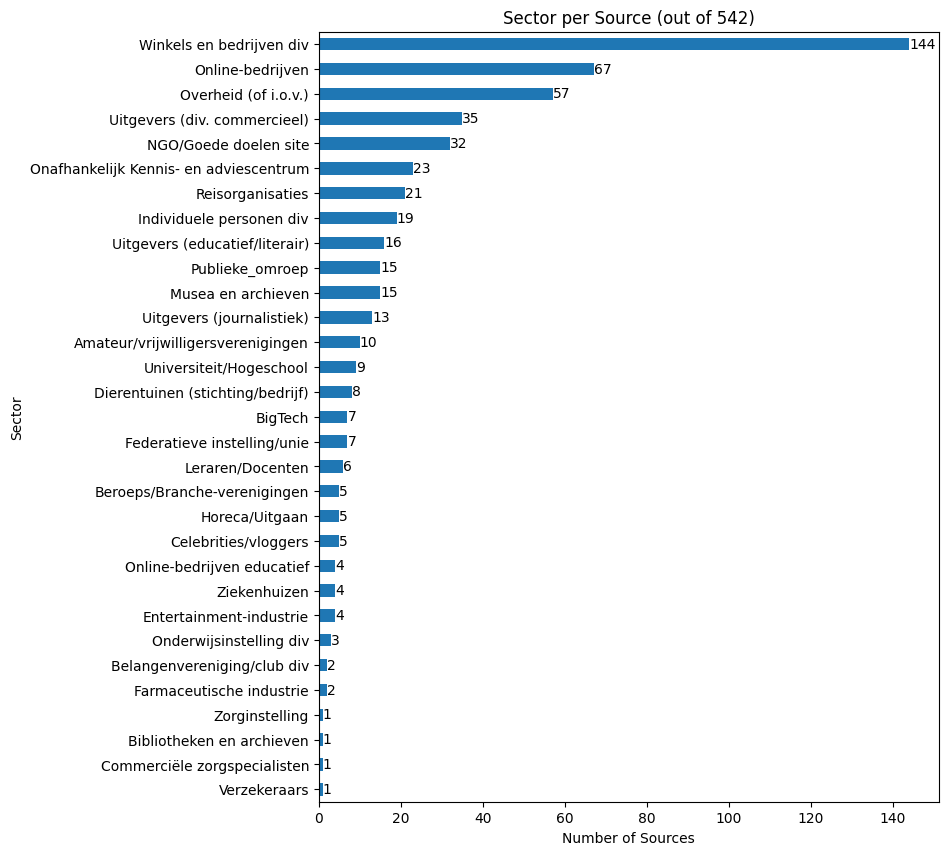

In [95]:
ax = (
    sources["Sector"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Sector per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Sector",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Free Labels

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '23'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '26'),
 Text(0, 0, '29'),
 Text(0, 0, '29'),
 Text(0, 0, '40'),
 Text(0, 0, '41'),
 Text(0, 0, '45'),
 

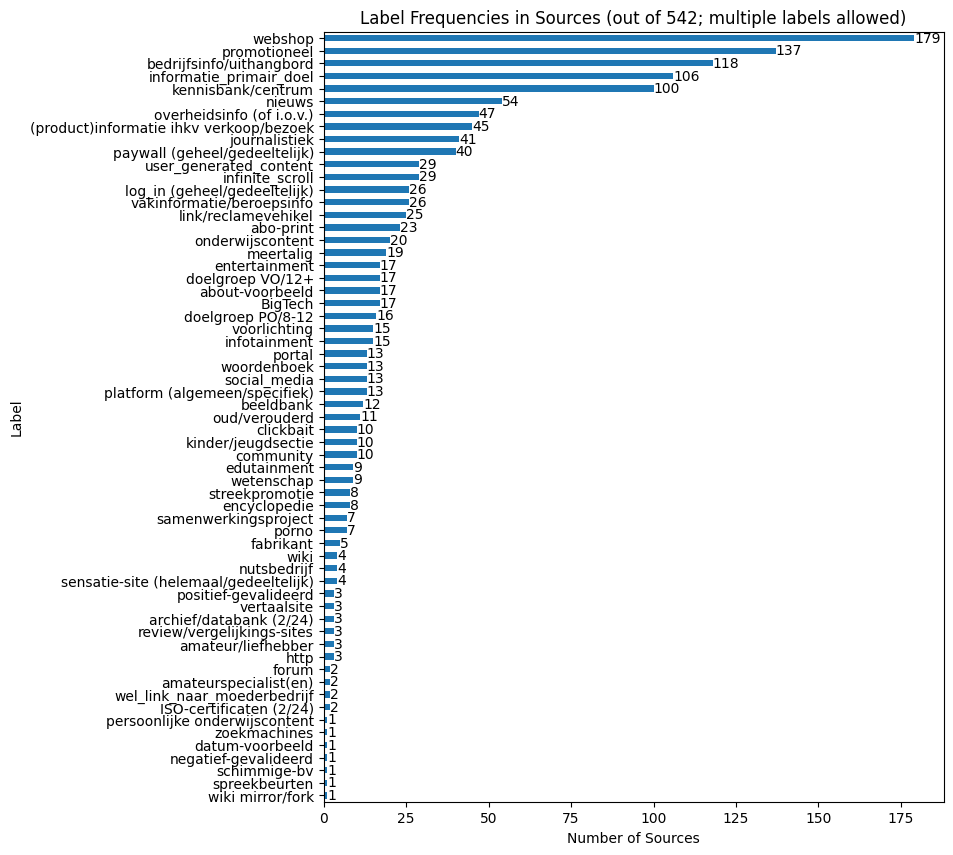

In [96]:
ax = (
    sources["Vrije labels bron/onderwerp"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(sources)}; multiple labels allowed)",
        xlabel="Number of Sources",
        ylabel="Label",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Trackers

<Axes: title={'center': 'Number of Blocked Trackers per Source (out of 542)'}, xlabel='Number of Sources', ylabel='Number of Blocked Trackers'>

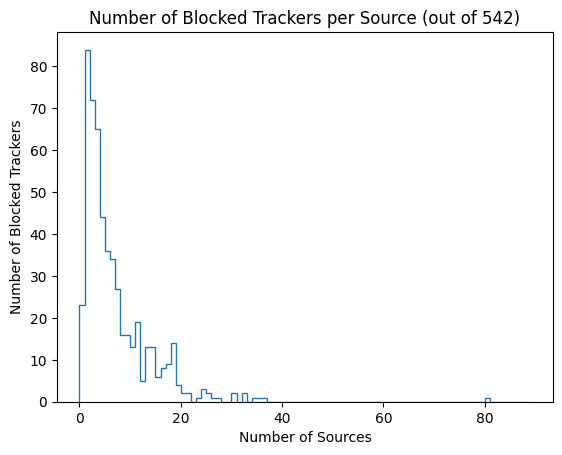

In [97]:
sources["uBlocked trackers"].plot(
    kind="hist",
    histtype="step",
    bins=range(0, 90),
    title=f"Number of Blocked Trackers per Source (out of {len(sources)})",
    ylabel="Number of Blocked Trackers",
    xlabel="Number of Sources",
)

[Text(0, 0, '17'),
 Text(0, 0, '2'),
 Text(0, 0, '6'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

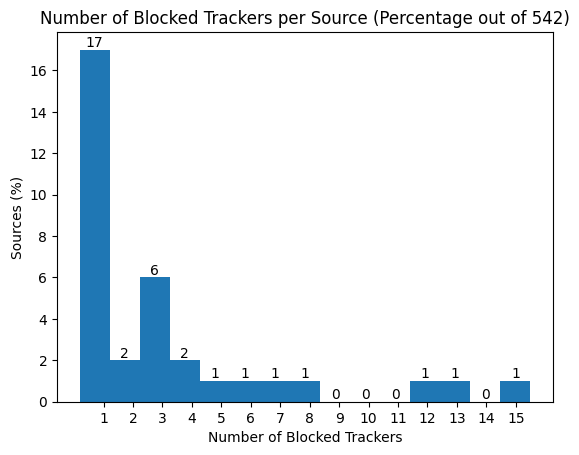

In [98]:
ax = (sources["uBlocked trackers"].value_counts(normalize=True) * 100).plot(
    kind="hist",
    xlabel="Number of Blocked Trackers",
    ylabel="Sources (%)",
    title=f"Number of Blocked Trackers per Source (Percentage out of {len(sources)})",
    xticks=range(1, 16),
    bins=15,
)
ax.bar_label(ax.containers[0])

### Ads

[Text(0, 0, '18'),
 Text(0, 0, '293'),
 Text(0, 0, '42'),
 Text(0, 0, '58'),
 Text(0, 0, '167'),
 Text(0, 0, '7'),
 Text(0, 0, '20'),
 Text(0, 0, '6')]

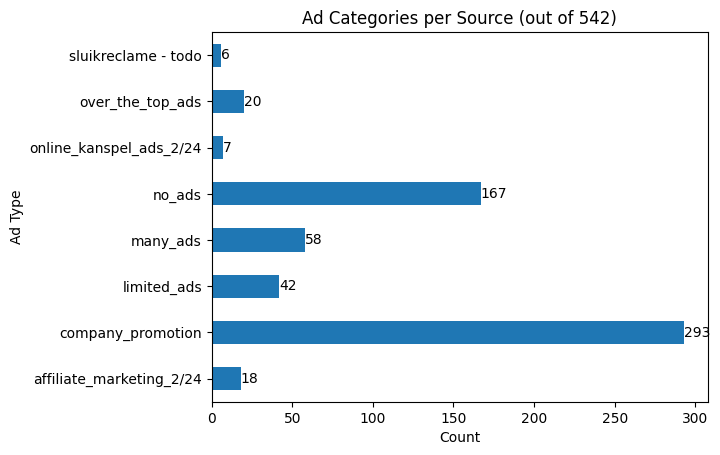

In [99]:
ax = (
    sources["Reclame"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()
    .sort_index()
    .plot(
        kind="barh",
        title=f"Ad Categories per Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Ad Type",
    )
)
ax.bar_label(ax.containers[0])

### Goal of Source

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '18'),
 Text(0, 0, '25'),
 Text(0, 0, '42'),
 Text(0, 0, '54'),
 Text(0, 0, '56'),
 Text(0, 0, '64'),
 Text(0, 0, '82'),
 Text(0, 0, '94')]

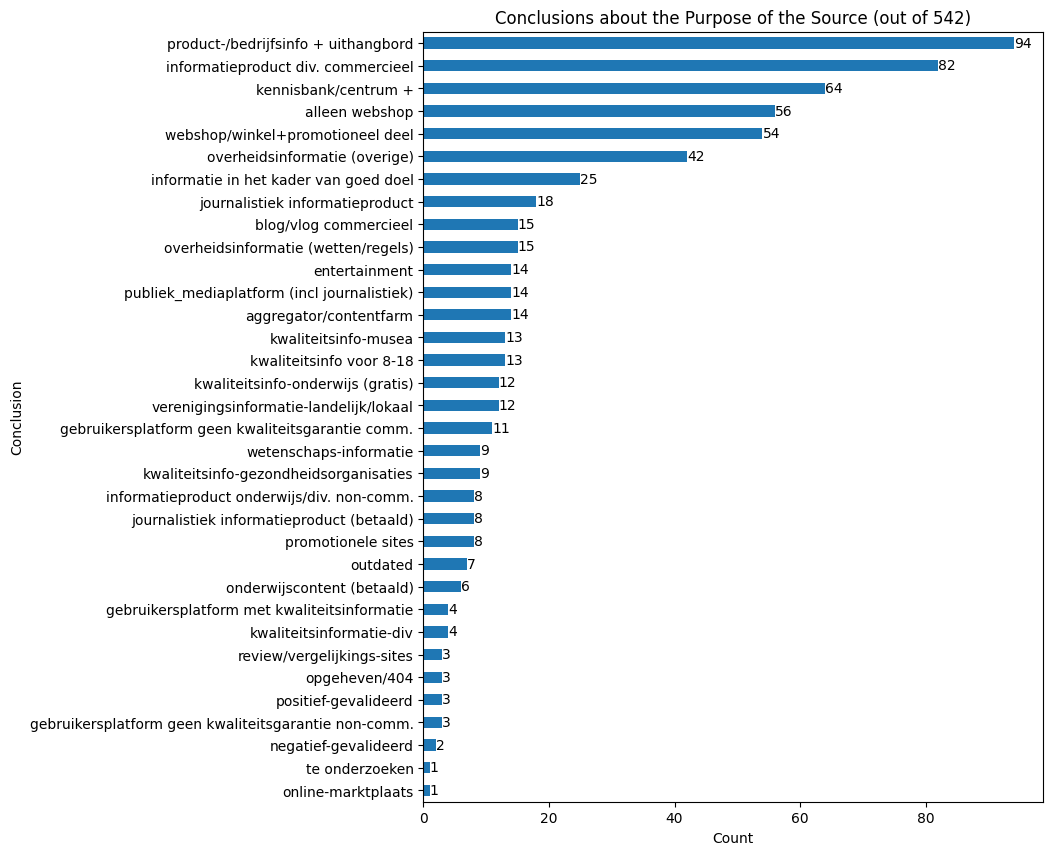

In [100]:
ax = (
    sources["Conclusie over doel vd bron"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Conclusions about the Purpose of the Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Conclusion",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Source: Thumbs-Up

[Text(0, 0, '19'), Text(0, 0, '166'), Text(0, 0, '175'), Text(0, 0, '182')]

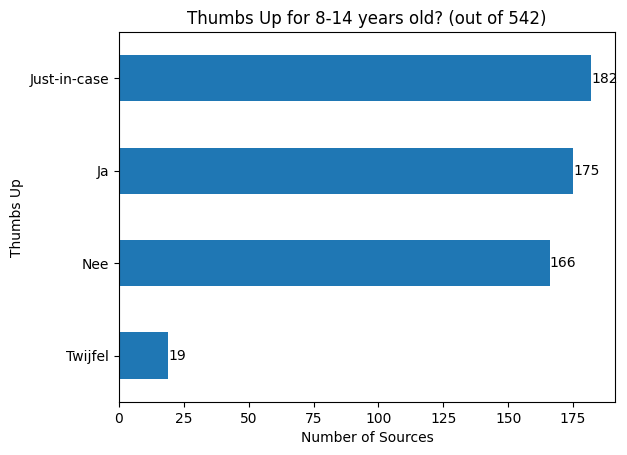

In [101]:
ax = (
    sources["Thumbs up 8-14?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Thumbs Up for 8-14 years old? (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Thumbs Up",
    )
)
ax.bar_label(ax.containers[0])

### About Page

[Text(0, 0, '1'),
 Text(0, 0, '10'),
 Text(0, 0, '14'),
 Text(0, 0, '38'),
 Text(0, 0, '62'),
 Text(0, 0, '204'),
 Text(0, 0, '213')]

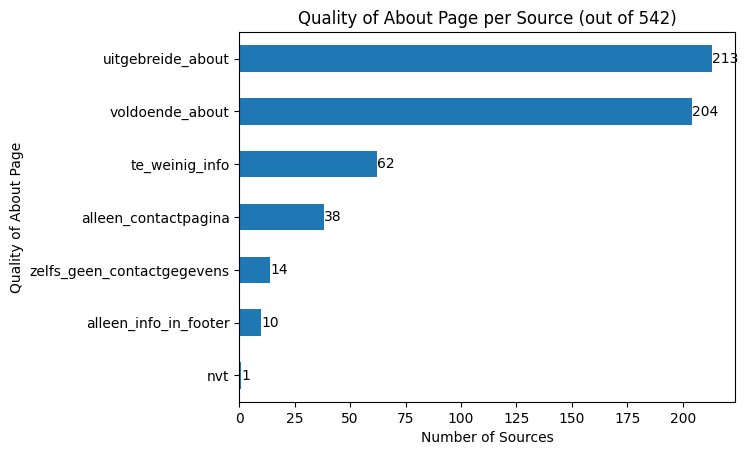

In [102]:
ax = (
    sources["Kwaliteit_about"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Quality of About Page per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Quality of About Page",
    )
)
ax.bar_label(ax.containers[0])

### Doelgroep vs. Thumbs-Up

In [103]:
doelgroep_po = sources.loc[
    (sources["Vrije labels bron/onderwerp"].notna())
    & (sources["Vrije labels bron/onderwerp"].str.contains("doelgroep PO/8-12"))
]
doelgroep_po

URL Domein  \
Name                                                                      
canonvannederland.nl                  https://www.canonvannederland.nl/   
dierenwiki.nl                                    https://dierenwiki.nl/   
dierpedia.nl                                      https://dierpedia.nl/   
docukit.nl                                      https://www.docukit.nl/   
natgeojunior.nl                             https://www.natgeojunior.nl   
rangerclub.be                                     https://rangerclub.be   
rangers.wwf.nl                                  https://rangers.wwf.nl/   
schoolsupport.nl                               https://schoolsupport.nl   
schooltv.nl                                        https://schooltv.nl/   
superspreekbeurt.nl                         https://superspreekbeurt.nl   
taal-oefenen.nl                             https://www.taal-oefenen.nl   
weetwatjeviert.nl                            https://weetwatjeviert.nl/   
wikikids.nl                                        https://wikikids.nl/   
wildvanfreek.nl                             https://www.wildvanfreek.nl   
willemwever.kro-ncrv.nl                https://willemwever.kro-ncrv.nl/   
youtube.com/@VarkentjeRundje  https://www.youtube.com/@VarkentjeRundje/   

                                                    Conclusie over doel vd bron  \
Name                                                                              
canonvannederland.nl                          kwaliteitsinfo-onderwijs (gratis)   
dierenwiki.nl                                            aggregator/contentfarm   
dierpedia.nl                  aggregator/contentfarm, informatieproduct div....   
docukit.nl                                             kwaliteitsinfo voor 8-18   
natgeojunior.nl                                        kwaliteitsinfo voor 8-18   
rangerclub.be                                          kwaliteitsinfo voor 8-18   
rangers.wwf.nl                informatie in het kader van goed doel, kwalite...   
schoolsupport.nl                                       kwaliteitsinfo voor 8-18   
schooltv.nl                   kwaliteitsinfo voor 8-18, publiek_mediaplatfor...   
superspreekbeurt.nl                                      aggregator/contentfarm   
taal-oefenen.nl               kwaliteitsinfo-onderwijs (gratis), onderwijsco...   
weetwatjeviert.nl                kennisbank/centrum +, kwaliteitsinfo voor 8-18   
wikikids.nl                   gebruikersplatform geen kwaliteitsgarantie non...   
wildvanfreek.nl                                        kwaliteitsinfo voor 8-18   
willemwever.kro-ncrv.nl       kwaliteitsinfo voor 8-18, publiek_mediaplatfor...   
youtube.com/@VarkentjeRundje                                      entertainment   

                             Thumbs up 8-14?  \
Name                                           
canonvannederland.nl                      Ja   
dierenwiki.nl                            Nee   
dierpedia.nl                             Nee   
docukit.nl                                Ja   
natgeojunior.nl                           Ja   
rangerclub.be                             Ja   
rangers.wwf.nl                            Ja   
schoolsupport.nl                          Ja   
schooltv.nl                               Ja   
superspreekbeurt.nl                      Nee   
taal-oefenen.nl                           Ja   
weetwatjeviert.nl                         Ja   
wikikids.nl                              Nee   
wildvanfreek.nl                           Ja   
willemwever.kro-ncrv.nl                   Ja   
youtube.com/@VarkentjeRundje    Just-in-case   

                                                         Sector  \
Name                                                              
canonvannederland.nl                         Musea en archieven   
dierenwiki.nl                                  Online-bedrijven   
dierpedia.nl                                   Online-bedrijven   
docukit.nl     

In [104]:
doelgroep_vo = sources.loc[
    (sources["Vrije labels bron/onderwerp"].notna())
    & (sources["Vrije labels bron/onderwerp"].str.contains("doelgroep VO/12+"))
]
doelgroep_vo

URL Domein  \
Name                                                                 
aljevragen.nl                            https://www.aljevragen.nl   
allesoverseks.be                     https://www.allesoverseks.be/   
biologielessen.nl                       https://biologielessen.nl/   
canonvannederland.nl             https://www.canonvannederland.nl/   
cyberpoli.nl                             https://www.cyberpoli.nl/   
dierenwiki.nl                               https://dierenwiki.nl/   
dierpedia.nl                                 https://dierpedia.nl/   
examenoverzicht.nl                 https://www.examenoverzicht.nl/   
jouwggd.nl                                 https://www.jouwggd.nl/   
mlochemie.nl                              https://www.mlochemie.nl   
mrchadd.nl                                 https://www.mrchadd.nl/   
schooltv.nl                                   https://schooltv.nl/   
seksualiteit.nl                            https://seksualiteit.nl   
sense.info                                      https://sense.info   
surinamewebquest.nl                http://www.surinamewebquest.nl/   
wetenschapsschool.nl             https://www.wetenschapsschool.nl/   
youtube.com/@WouterRenkema  https://www.youtube.com/@WouterRenkema   

                                                  Conclusie over doel vd bron  \
Name                                                                            
aljevragen.nl                              informatieproduct div. commercieel   
allesoverseks.be            kwaliteitsinfo voor 8-18, overheidsinformatie ...   
biologielessen.nl                           kwaliteitsinfo-onderwijs (gratis)   
canonvannederland.nl                        kwaliteitsinfo-onderwijs (gratis)   
cyberpoli.nl                                         kwaliteitsinfo voor 8-18   
dierenwiki.nl                                          aggregator/contentfarm   
dierpedia.nl                aggregator/contentfarm, informatieproduct div....   
examenoverzicht.nl                                 onderwijscontent (betaald)   
jouwggd.nl                             kwaliteitsinfo-gezondheidsorganisaties   
mlochemie.nl                                kwaliteitsinfo-onderwijs (gratis)   
mrchadd.nl                  kwaliteitsinfo-onderwijs (gratis), onderwijsco...   
schooltv.nl                 kwaliteitsinfo voor 8-18, publiek_mediaplatfor...   
seksualiteit.nl             informatie in het kader van goed doel, kennisb...   
sense.info                                           kwaliteitsinfo voor 8-18   
surinamewebquest.nl                         kwaliteitsinfo-onderwijs (gratis)   
wetenschapsschool.nl        kwaliteitsinfo-onderwijs (gratis), onderwijsco...   
youtube.com/@WouterRenkema                  kwaliteitsinfo-onderwijs (gratis)   

                           Thumbs up 8-14?  \
Name                                         
aljevragen.nl                 Just-in-case   
allesoverseks.be                        Ja   
biologielessen.nl                       Ja   
canonvannederland.nl                    Ja   
cyberpoli.nl                            Ja   
dierenwiki.nl                          Nee   
dierpedia.nl                           Nee   
examenoverzicht.nl            Just-in-case   
jouwggd.nl                              Ja   
mlochemie.nl                            Ja   
mrchadd.nl                              Ja   
schooltv.nl                             Ja   
seksualiteit.nl                         Ja   
sense.info                              Ja   
surinamewebquest.nl                     Ja   
wetenschapsschool.nl                    Ja   
youtube.com/@WouterRenkema              Ja   

                                                            Sector  \
Name                                                                 
aljevragen.nl                                     Leraren/Docenten   
allesoverseks.be                              Overheid (of i.o.v.)   
biologielessen.nl             

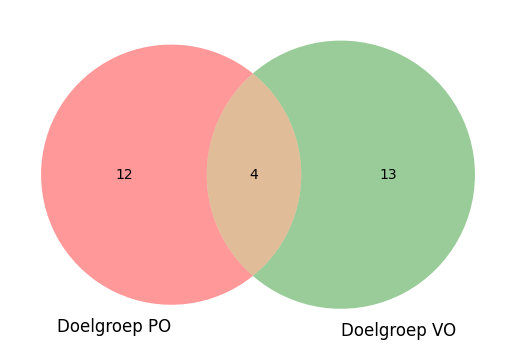

In [105]:
from matplotlib_venn import venn2

venn2(
    [set(doelgroep_po.index), set(doelgroep_vo.index)],
    set_labels=["Doelgroep PO", "Doelgroep VO"],
)

[Text(0, 0, '11'), Text(0, 0, '4'), Text(0, 0, '1')]

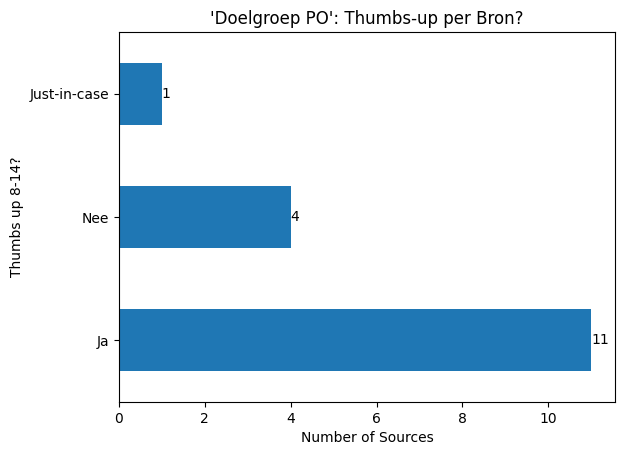

In [106]:
ax = (
    doelgroep_po["Thumbs up 8-14?"]
    .value_counts()
    .plot(
        kind="barh",
        title="'Doelgroep PO': Thumbs-up per Bron?",
        xlabel="Number of Sources",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '13'), Text(0, 0, '2'), Text(0, 0, '2')]

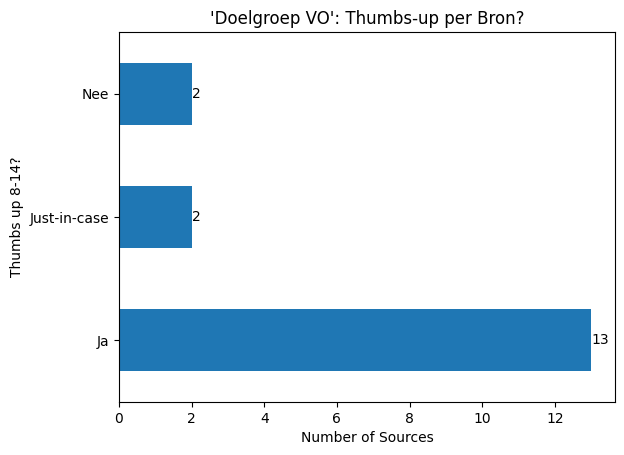

In [107]:
ax = (
    doelgroep_vo["Thumbs up 8-14?"]
    .value_counts()
    .plot(
        kind="barh",
        title="'Doelgroep VO': Thumbs-up per Bron?",
        xlabel="Number of Sources",
    )
)
ax.bar_label(ax.containers[0])

### Top-level domains

In [108]:
sources["tld"] = sources["URL Domein"].str.split(".").str[-1].str.split("/").str[0]
sources["tld"].value_counts()

tld
nl                                 390
com                                 76
be                                  40
org                                 13
net                                  7
nu                                   3
brussels                             2
fr                                   2
n                                    1
gov                                  1
122                                  1
info                                 1
shop                                 1
gent                                 1
redirect                             1
do?ctx=46163,46173&anav=4154073      1
html                                 1
Name: count, dtype: int64

[Text(0, 0, '(127 / 390)'),
 Text(0, 0, '(6 / 76)'),
 Text(0, 0, '(27 / 40)'),
 Text(0, 0, '(7 / 13)'),
 Text(0, 0, '(3 / 7)')]

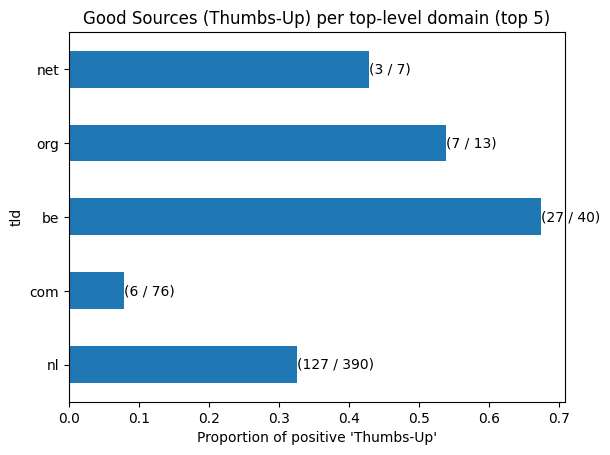

In [109]:
n = 5
tlds = pd.Series(sources["tld"].value_counts()[:n])

ja_counts = pd.Series(
    [
        len(sources.loc[(sources["tld"] == tld) & (sources["Thumbs up 8-14?"] == "Ja")])
        for tld in tlds.index
    ],
    index=tlds.index,
)
ja_counts
ax = (ja_counts / tlds).plot(
    kind="barh",
    title=f"Good Sources (Thumbs-Up) per top-level domain (top {n})",
    xlabel="Proportion of positive 'Thumbs-Up'",
    legend=False,
)

bar_labels = [
    f"({int(ja_counts[tld])} / { sources['tld'].value_counts()[tld]})"
    for tld in tlds.index
]
ax.bar_label(ax.containers[0], labels=bar_labels)

## Queries and Result Pages

### Ok/Good/Bad for Students

[Text(0, 0, '35'),
 Text(0, 0, '20'),
 Text(0, 0, '15'),
 Text(0, 0, '9'),
 Text(0, 0, '2'),
 Text(0, 0, '9'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

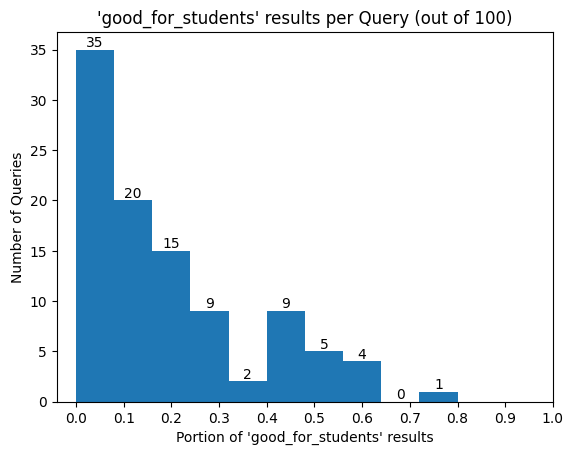

In [110]:
column = "good_for_students"

grouped = results_sources.groupby("Query")
ax = grouped.apply(
    lambda group: group[column].sum() / len(group), include_groups=False
).plot(
    kind="hist",
    bins=10,
    title=f"'{column}' results per Query (out of {len(grouped)})",
    xlabel=f"Portion of '{column}' results",
    ylabel="Number of Queries",
    xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '36'),
 Text(0, 0, '28'),
 Text(0, 0, '11'),
 Text(0, 0, '7'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '7')]

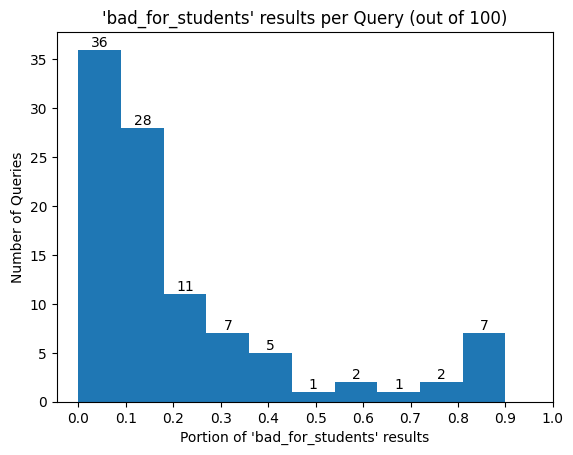

In [111]:
column = "bad_for_students"

grouped = results_sources.groupby("Query")
ax = grouped.apply(
    lambda group: group[column].sum() / len(group), include_groups=False
).plot(
    kind="hist",
    bins=10,
    title=f"'{column}' results per Query (out of {len(grouped)})",
    xlabel=f"Portion of '{column}' results",
    ylabel="Number of Queries",
    xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '7'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '13'),
 Text(0, 0, '8'),
 Text(0, 0, '4'),
 Text(0, 0, '18'),
 Text(0, 0, '41')]

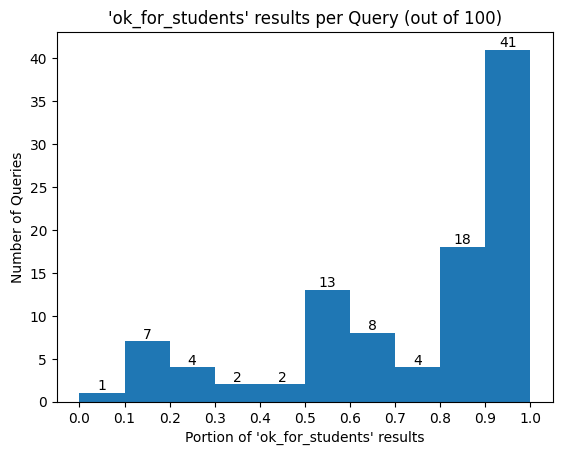

In [112]:
column = "ok_for_students"

grouped = results_sources.groupby("Query")
ax = grouped.apply(
    lambda group: group[column].sum() / len(group), include_groups=False
).plot(
    kind="hist",
    bins=10,
    title=f"'{column}' results per Query (out of {len(grouped)})",
    xlabel=f"Portion of '{column}' results",
    ylabel="Number of Queries",
    xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
)
ax.bar_label(ax.containers[0])

In [113]:
columns = ["good_for_students", "bad_for_students", "ok_for_students"]
results_sources.loc[~results_sources[columns].any(axis=1)]

Bron: Thumbs up?                                    Titel resultaat  \
2                Nee                             Knups - Wist je datjes   
102              Nee  33 Nutteloze feitjes om enorm indruk mee te ma...   
146              Nee  wereldwonderen.com/oude-wereldwonderen/piramid...   
156              Nee                                Engeland - Wikikids   
176              Nee  Babynamen: dé trends in 2022 | WIJ Geboortekaa...   
..               ...                                                ...   
935              Nee  De straatkinderen - Reisverslag uit Ulaanbaata...   
980              Nee  D-reizen - Cruise Middellandse Zee – Veel keuz...   
987              Nee                                   Zebra - Wikikids   
994              Nee  Messi laat zich uit over strijd met 'aartsriva...   
997              Nee                  Azerty - YouTube  (Video Facet 1)   

     Ranking                                     Link/resultaat  \
2          1                   https://www.knups.nl/wist-je-dat   
102        2  https://www.saarmagazine.nl/33-nutteloze-feitj...   
146        2  https://www.wereldwonderen.com/oude-wereldwond...   
156        2                       https://wikikids.nl/Engeland   
176        2  https://wijgeboortekaartjes.nl/inspiratie/baby...   
..       ...                                                ...   
935       10  https://straatkinderenchoibalsan.waarbenjij.nu...   
980       10  https://www.d-reizen.nl/cruise/middellandse-ze...   
987       11                          https://wikikids.nl/Zebra   
994       12  https://www.soccernews.nl/news/messi-laat-zich...   
997     <NA>  https://www.youtube.com/channel/UC7ZEsyQv8FAYk...   

                                 Query      Relevant? vrije tags page  \
2                         wist je dat?       relevant        outdated   
102                       wist je dat?       relevant             NaN   
146                   PIRAMIDES CHEOPS       relevant             NaN   
156                           engeland       relevant             NaN   
176                     populairenamen       relevant             NaN   
..                                 ...            ...             ...   
935  Hoe komen straatkinderen aan eten       relevant             NaN   
980                   middellandse zee  niet_relevant             NaN   
987                              zebra       relevant             NaN   
994                            ronaldo       relevant             NaN   
997                             azerty  niet_relevant             NaN   

                 Bronnen DB  \
2                  knups.nl   
102         saarmagazine.nl   
146     dewereldwonderen.nl   
156             wikikids.nl   
176  wijgeboortekaartjes.nl   
..                      ...   
935           waarbenjij.nu   
980             d-reizen.nl   
987             wikikids.nl   
994           soccernews.nl   
997               azerty.nl   

                                    Bron: Inst/Bedrijf  \
2                                             Knups.nl   
102                       Saar Magazine, Snippet Media   
146  Joey van Beerschoten? (viaSIDN/LInkedin: Owner...   
156  Stichting Wikikids, ondersteund door Kennisnet...   
176  WIJ Geboortekaartjes 2024 | powered by DRN Car...   
..                                                 ...   
935                                      waarbenjij.nu   
980                                           D-reizen   
987  Stichting Wikikids, ondersteund door Kennisnet...   
994                                         Soccernews   
997                                             Azerty   

    Toegankelijkheid doelgroep (indruk)  ... SlimZ Resultaten DB  \
2                 redelijk_begrijpelijk  ...                 NaN   
102               redelijk_begrijpelijk  ...                 NaN   
146                             complex  ...                 NaN   
156                             complex  ...                 NaN   
176        

In [114]:
columns = ["good_for_students", "bad_for_students"]
results_sources.loc[results_sources[columns].all(axis=1)]

Empty DataFrame
Columns: [Bron: Thumbs up?, Titel resultaat, Ranking, Link/resultaat, Query, Relevant?, vrije tags page, Bronnen DB, Bron: Inst/Bedrijf, Toegankelijkheid doelgroep (indruk), Soort Resultaat, Bron: Vrije labels, Bron: Commerciality, Bron: Sector, Q: soort, Bron: reclame, Opmerking, Q: Ranking vrije labels, Bron: doel, Bron: Trackers, OnderzoekNr, Related to Bronnen DB test (Resultaten DB), Bronnen: URL domein, Query: Video Schooltv, Created by_source, Bron-Status, Bron: Onderwerp, URL Domein, Conclusie over doel vd bron, Thumbs up 8-14?, Sector, Reclame, Vrije labels bron/onderwerp, uBlocked trackers, Commercialiteit, Onderwerpen, Div Labels NGO, Status, About page,  Notes, Kwaliteit_about, Instelling/Bedrijf/Persoon, Resultaten: vrije labels, Moederbedrijf DB, onderzoekNR, Toegankelijkheidspagina, Resultaten DB, Extra URL, Created time, Created by_result, URL Moederbedrijf, SlimZ Resultaten DB, Resultaten: toegankelijkheid, Cookie info page, More examples, Related to Resultaten DB 01 (1) (Bronnen DB), Res: Ranking, Res: soort result , ok_for_students, good_for_students, bad_for_students]
Index: []

[0 rows x 61 columns]

### Soort Resultaten Distribution per Query

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_9370/2519624949.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '3'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '25'),
 Text(0, 0, '21')]

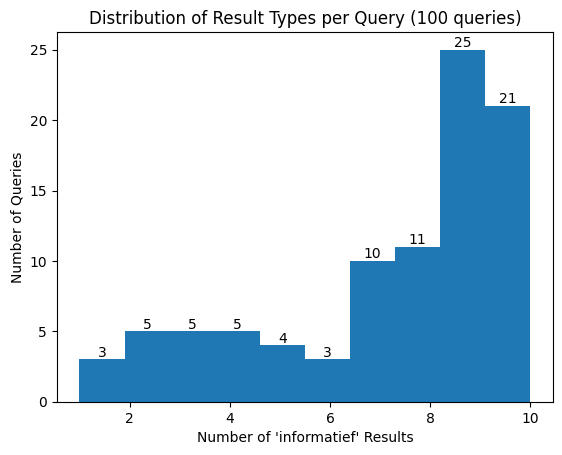

In [115]:
column = "Soort Resultaat"
value = "informatief"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_9370/1416800553.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '10'),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '5')]

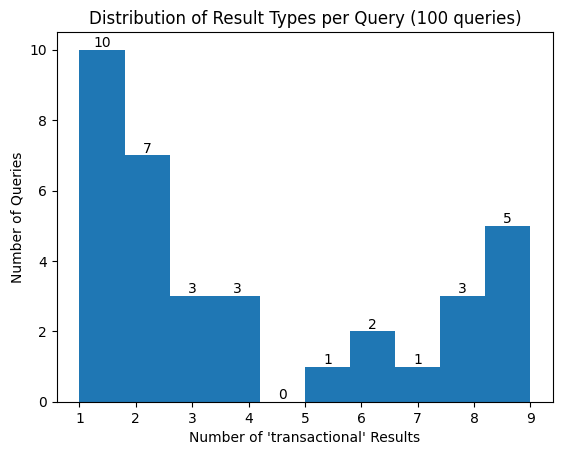

In [116]:
column = "Soort Resultaat"
value = "transactional"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_9370/3201790118.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '28'),
 Text(0, 0, '18'),
 Text(0, 0, '8'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '2')]

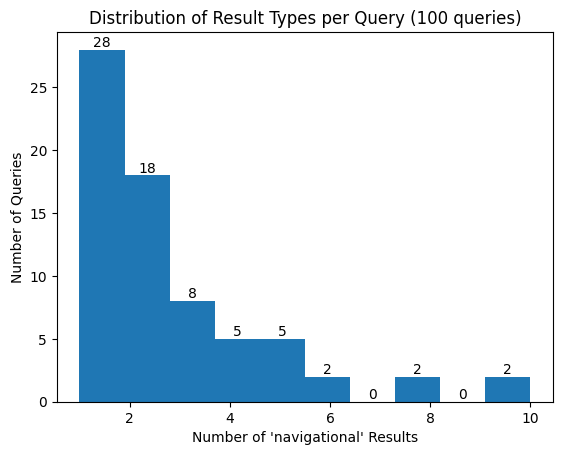

In [117]:
column = "Soort Resultaat"
value = "navigational"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

### Accessibility Distribution per Query

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_9370/3774244460.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '16'),
 Text(0, 0, '9'),
 Text(0, 0, '16'),
 Text(0, 0, '7'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

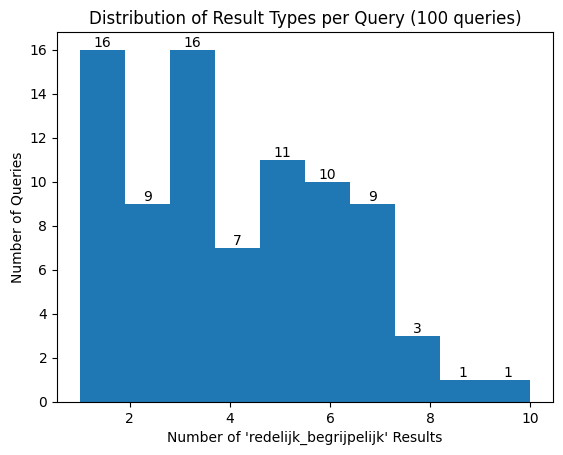

In [118]:
column = "Toegankelijkheid doelgroep (indruk)"
value = "redelijk_begrijpelijk"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_9370/1130612084.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


[Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

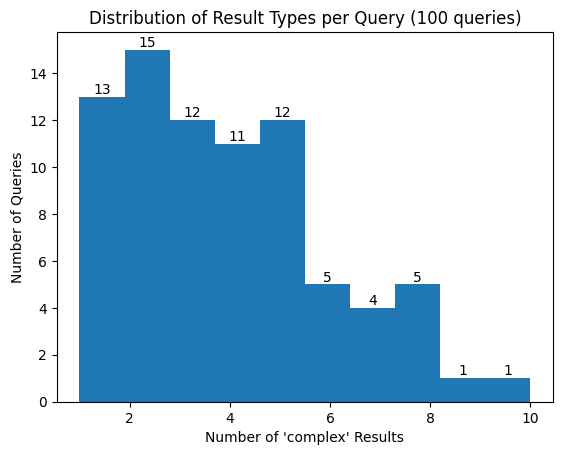

In [119]:
column = "Toegankelijkheid doelgroep (indruk)"
value = "complex"

ax = (
    results.groupby("Query")
    .apply(
        lambda x: x[column]
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts(ascending=True)
    )
    .reset_index()
    .set_index(column)
    .loc[value]
    .plot(
        kind="hist",
        title=f"Distribution of Result Types per Query ({len(results.groupby('Query'))} queries)",
        xlabel=f"Number of '{value}' Results",
        ylabel="Number of Queries",
        legend=False,
    )
)
ax.bar_label(ax.containers[0])

### Age

Text(0, 0.5, 'Number of Queries')

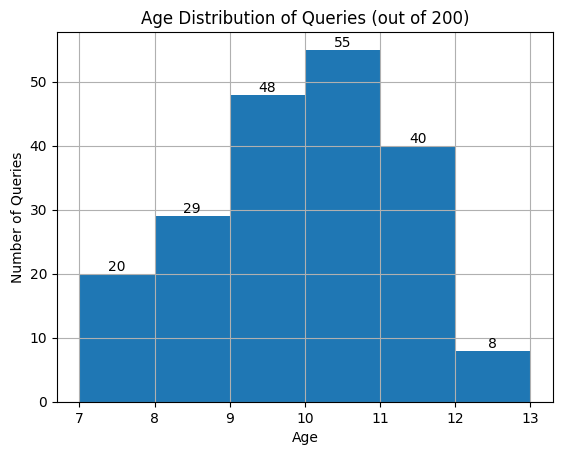

In [120]:
bins = range(all_queries["Leeftijd"].min(), all_queries["Leeftijd"].max() + 2)

hist = all_queries.hist(column="Leeftijd", bins=bins)
for ax in hist.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Number of Queries")
    ax.bar_label(ax.containers[0])
ax.title.set_text(f"Age Distribution of Queries (out of {len(all_queries)})")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Queries")

### Query Length

[Text(0, 0, '108'),
 Text(0, 0, '50'),
 Text(0, 0, '22'),
 Text(0, 0, '10'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

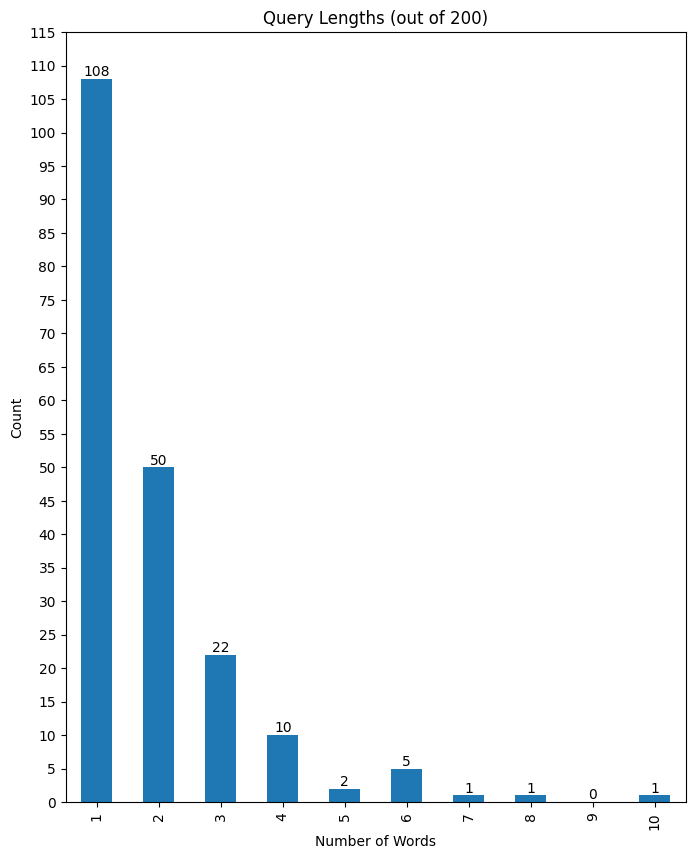

In [121]:
lengths = all_queries["Query"].str.strip().str.split().str.len().value_counts()
values = range(1, lengths.index.max() + 1)

ax = lengths.reindex(values, fill_value=0).plot(
    kind="bar",
    title=f"Query Lengths (out of {len(all_queries)})",
    ylabel="Count",
    xlabel="Number of Words",
    figsize=(8, 10),
    yticks=range(0, 120, 5),
)
ax.bar_label(ax.containers[0])

### Query Type

[Text(0, 0, '16'),
 Text(0, 0, '19'),
 Text(0, 0, '36'),
 Text(0, 0, '55'),
 Text(0, 0, '74')]

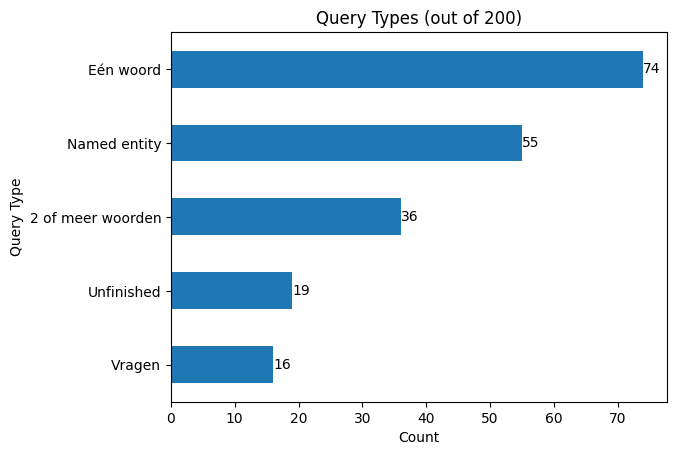

In [122]:
ax = (
    all_queries["Soort Query (select)"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Query Types (out of {len(all_queries)})",
        ylabel="Query Type",
        xlabel="Count",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '16'),
 Text(0, 0, '24'),
 Text(0, 0, '36')]

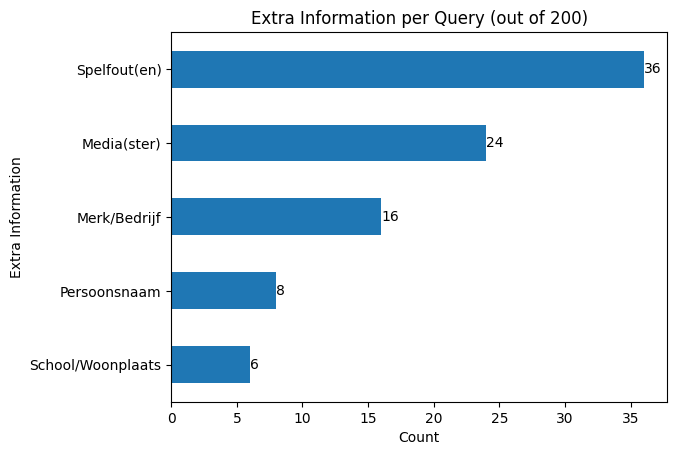

In [123]:
ax = (
    all_queries["Extra (multi)"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Extra Information per Query (out of {len(all_queries)})",
        xlabel="Count",
        ylabel="Extra Information",
    )
)
ax.bar_label(ax.containers[0])

### Result Page Extras

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '25'),
 Text(0, 0, '29'),
 Text(0, 0, '68'),
 Text(0, 0, '86')]

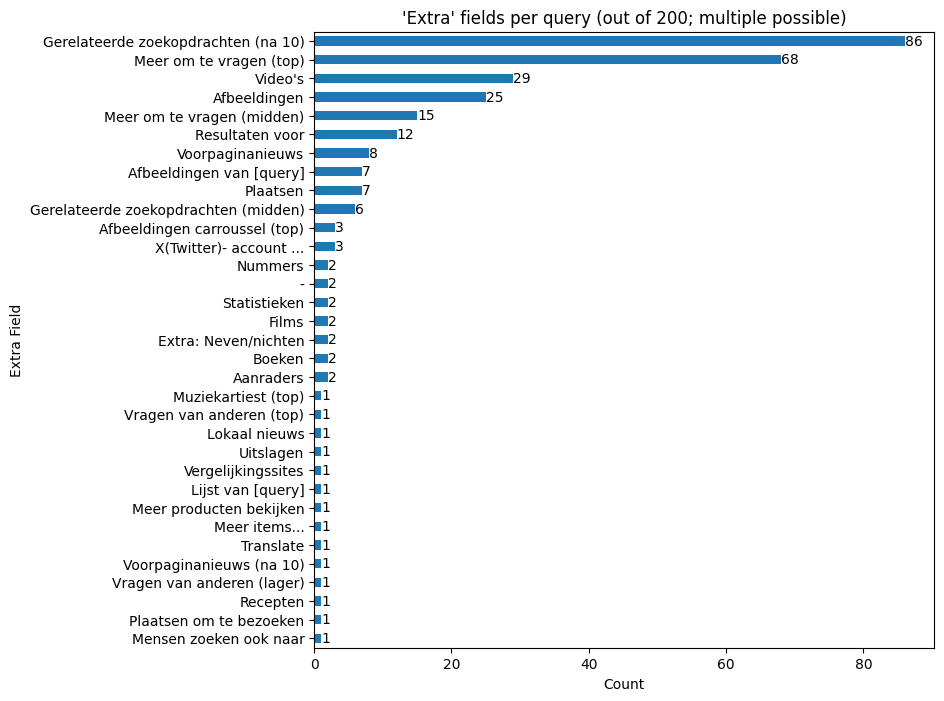

In [124]:
ax = (
    all_queries["Extra (top-down)"]
    .str.split(", ")
    .explode()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"'Extra' fields per query (out of {len(all_queries)}; multiple possible)",
        figsize=(8, 8),
        xlabel="Count",
        ylabel="Extra Field",
    )
)
ax.bar_label(ax.containers[0])

# Export

In [125]:
%pip install nbconvert rpds-py==0.5.3


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [128]:
!jupyter nbconvert --to markdown analysis.ipynb

zsh:1: /Users/carstenschnober/.local/bin/jupyter: bad interpreter: /Users/carstenschnober/opt/anaconda3/envs/SoS/bin/python: no such file or directory
[NbConvertApp] Converting notebook analysis.ipynb to markdown
[NbConvertApp] Support files will be in analysis_files/
[NbConvertApp] Writing 215635 bytes to analysis.md
